**최대한 이론 강의 시간에 배웠던 함수들을 사용하여 풀기!** + seaborn 내용도 나오니 seaborn_기본.ipynb 숙지한 후 풀기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 타이타닉 데이터 로드
ti = sns.load_dataset('titanic') 

In [4]:
# ti가 몇개의 행과 열로 구성된 데이터프레임인지 확인
ti.shape 

(891, 15)

In [5]:
# ti의 맨 앞 2개의 row만 확인 & ti의 맨 뒤 2개의 row만 확인
display(
    ti.head(2),
    ti.tail(2)
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [6]:
# ti의 컬럼명들을 확인
ti.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
# ti의 각 변수들의 non-null 데이터 개수와 type 파악하기 
ti.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# ti 변수들 중 numeric(숫자형) 변수들의 분포 특성 파악
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


---

In [9]:
ti.describe(include = "all")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# ti에서 survived, sex ,age, fare, class, who column애 해당하는 데이터만 뽑아서 df 변수에 할당
df = ti[["survived", "sex", "age", "fare", "class", "who"]]
# df의 행과 열 크기 출력
print(df.shape)
# df의 맨 앞 2개의 행만 보기
display(
    df.head(2),
    df.tail(2)
)

(891, 6)


,survived,sex,age,fare,class,who
0,0,male,22.0,7.2500,Third,man
1,1,female,38.0,71.2833,First,woman


,survived,sex,age,fare,class,who
889,1,male,26.0,30.00,First,man
890,0,male,32.0,7.75,Third,man


In [11]:
# 간단하게 survived의 각 변수별 데이터의 수 확인. 산 사람(1)은 몇명이고 죽은 사람(0)은 몇명인가
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

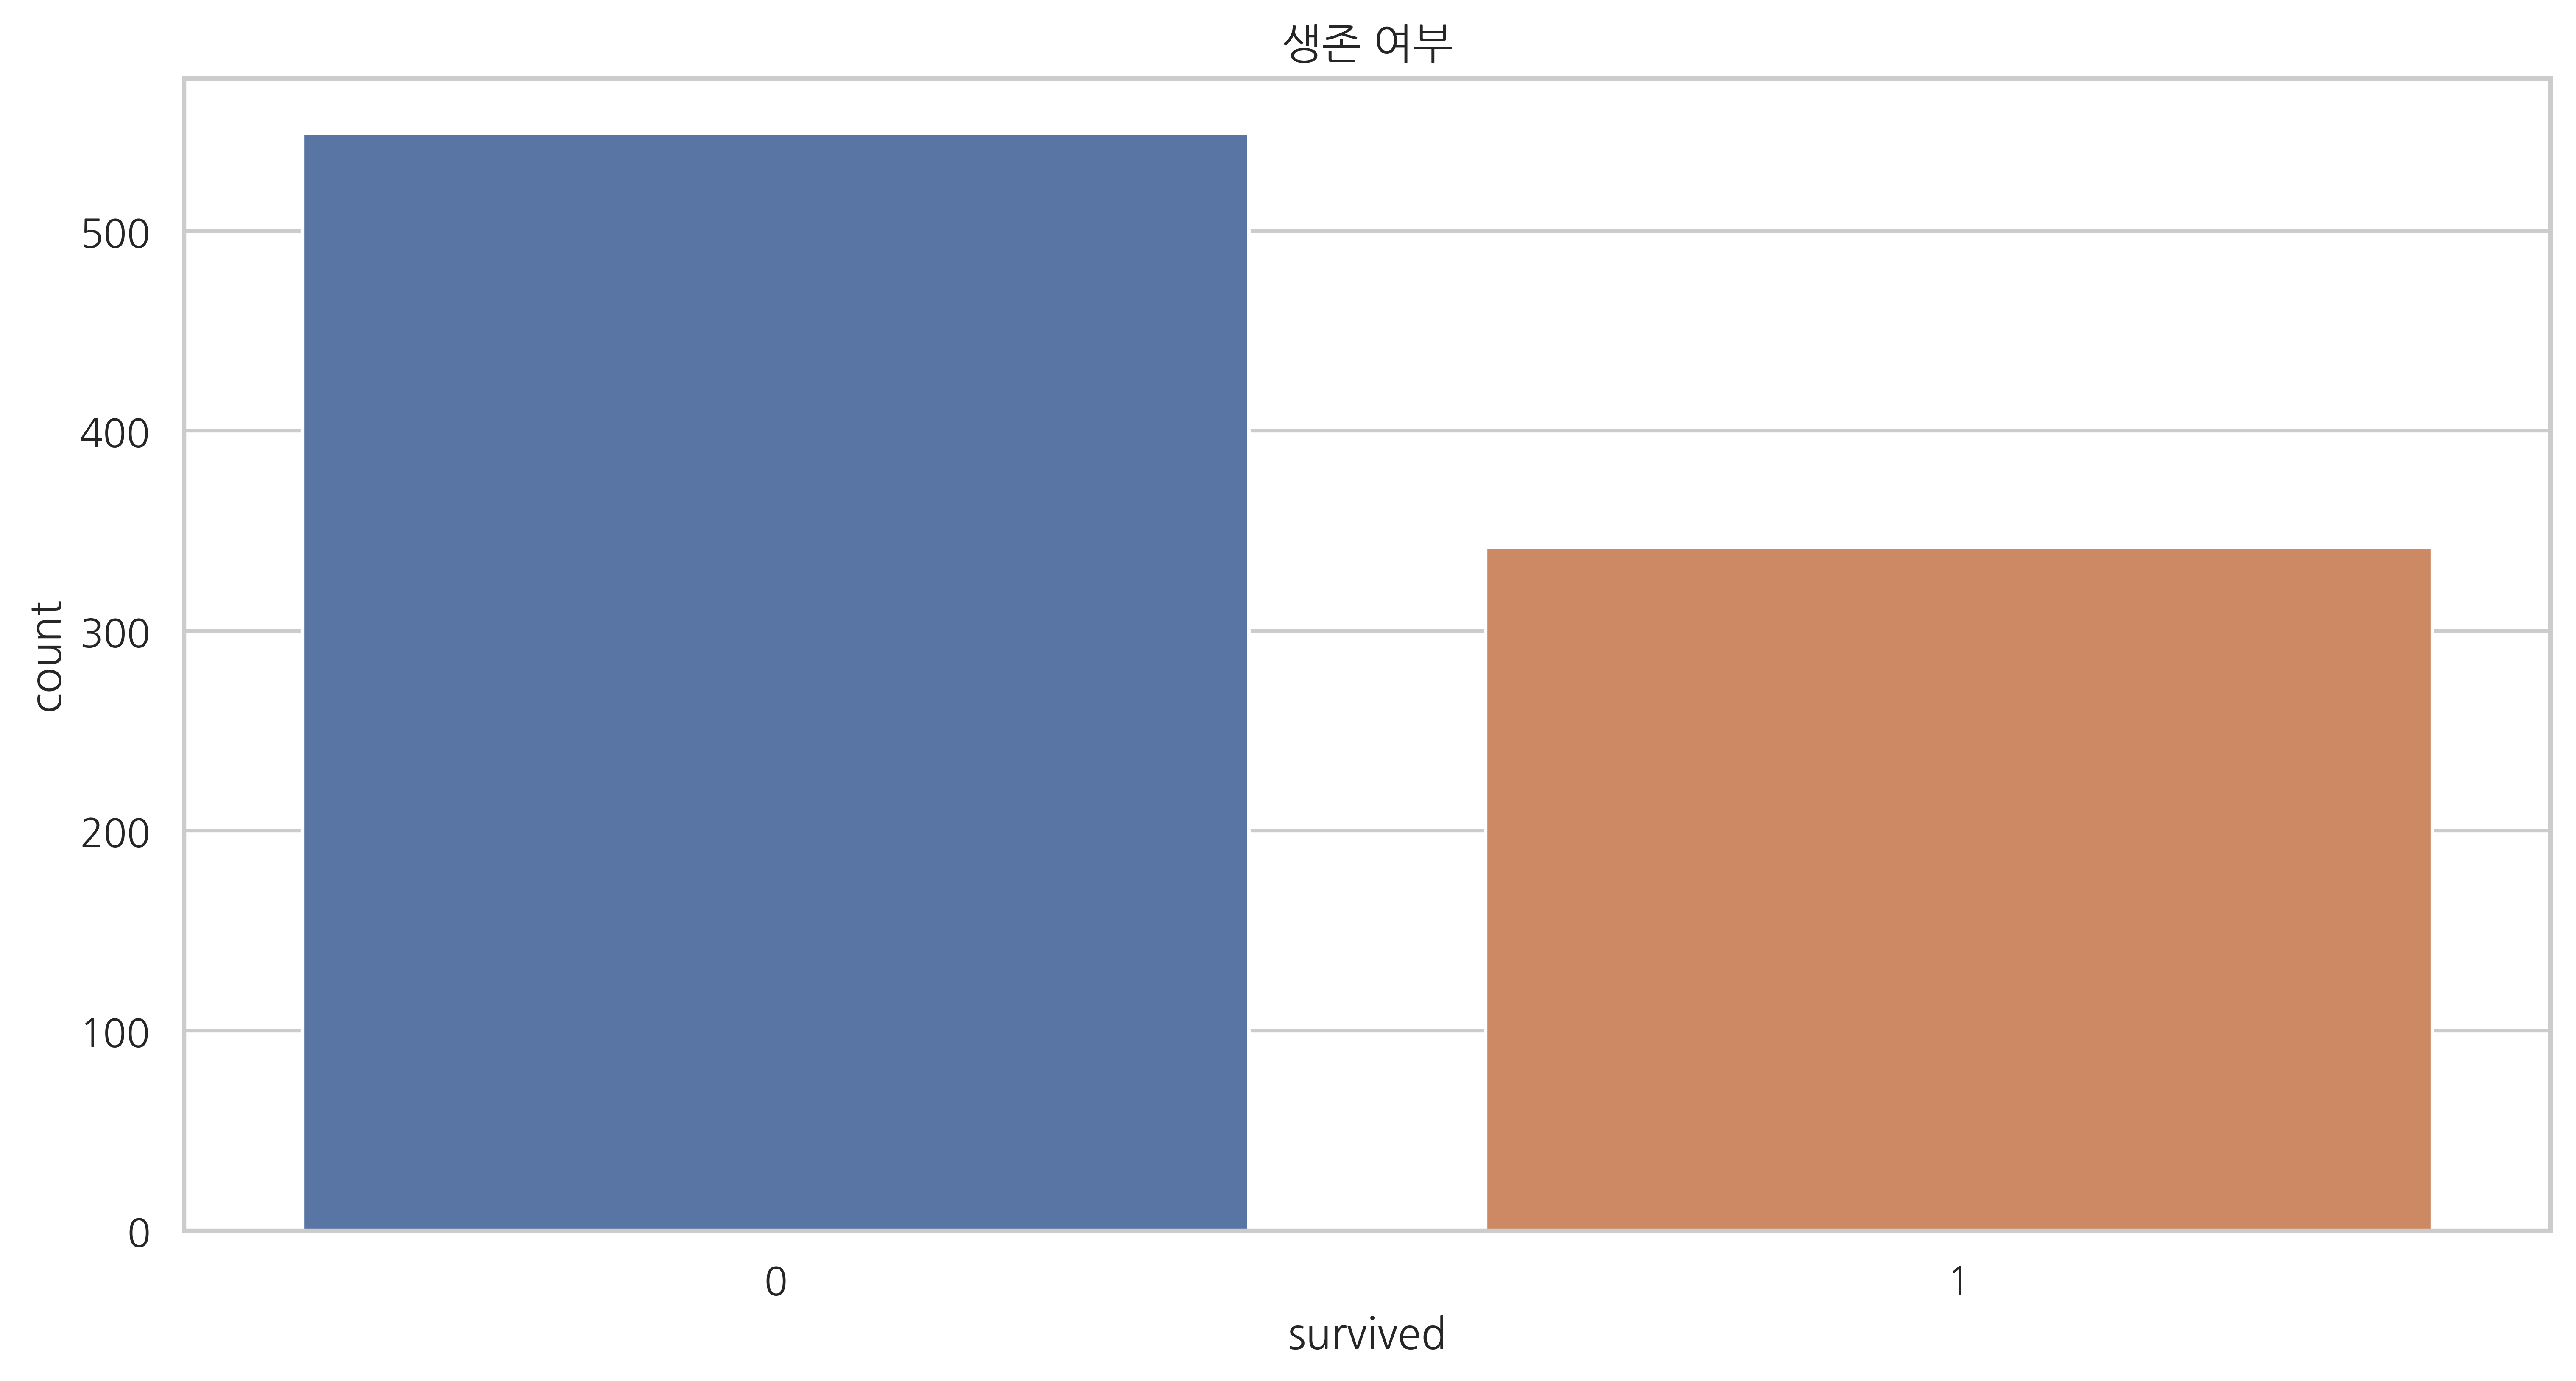

In [12]:
# survived별 사람의 수 count하여 시각화 (seaborn 사용)
sns.countplot("survived", data=df)
plt.title("생존 여부")
plt.show()

In [13]:
# who 변수의 unique한 데이터 확인 및 출력
# class 변수의 unique한 데이터 확인 및 출력
display(
    df.who.unique(),
    df["class"].unique()
)


array(['man', 'woman', 'child'], dtype=object)

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

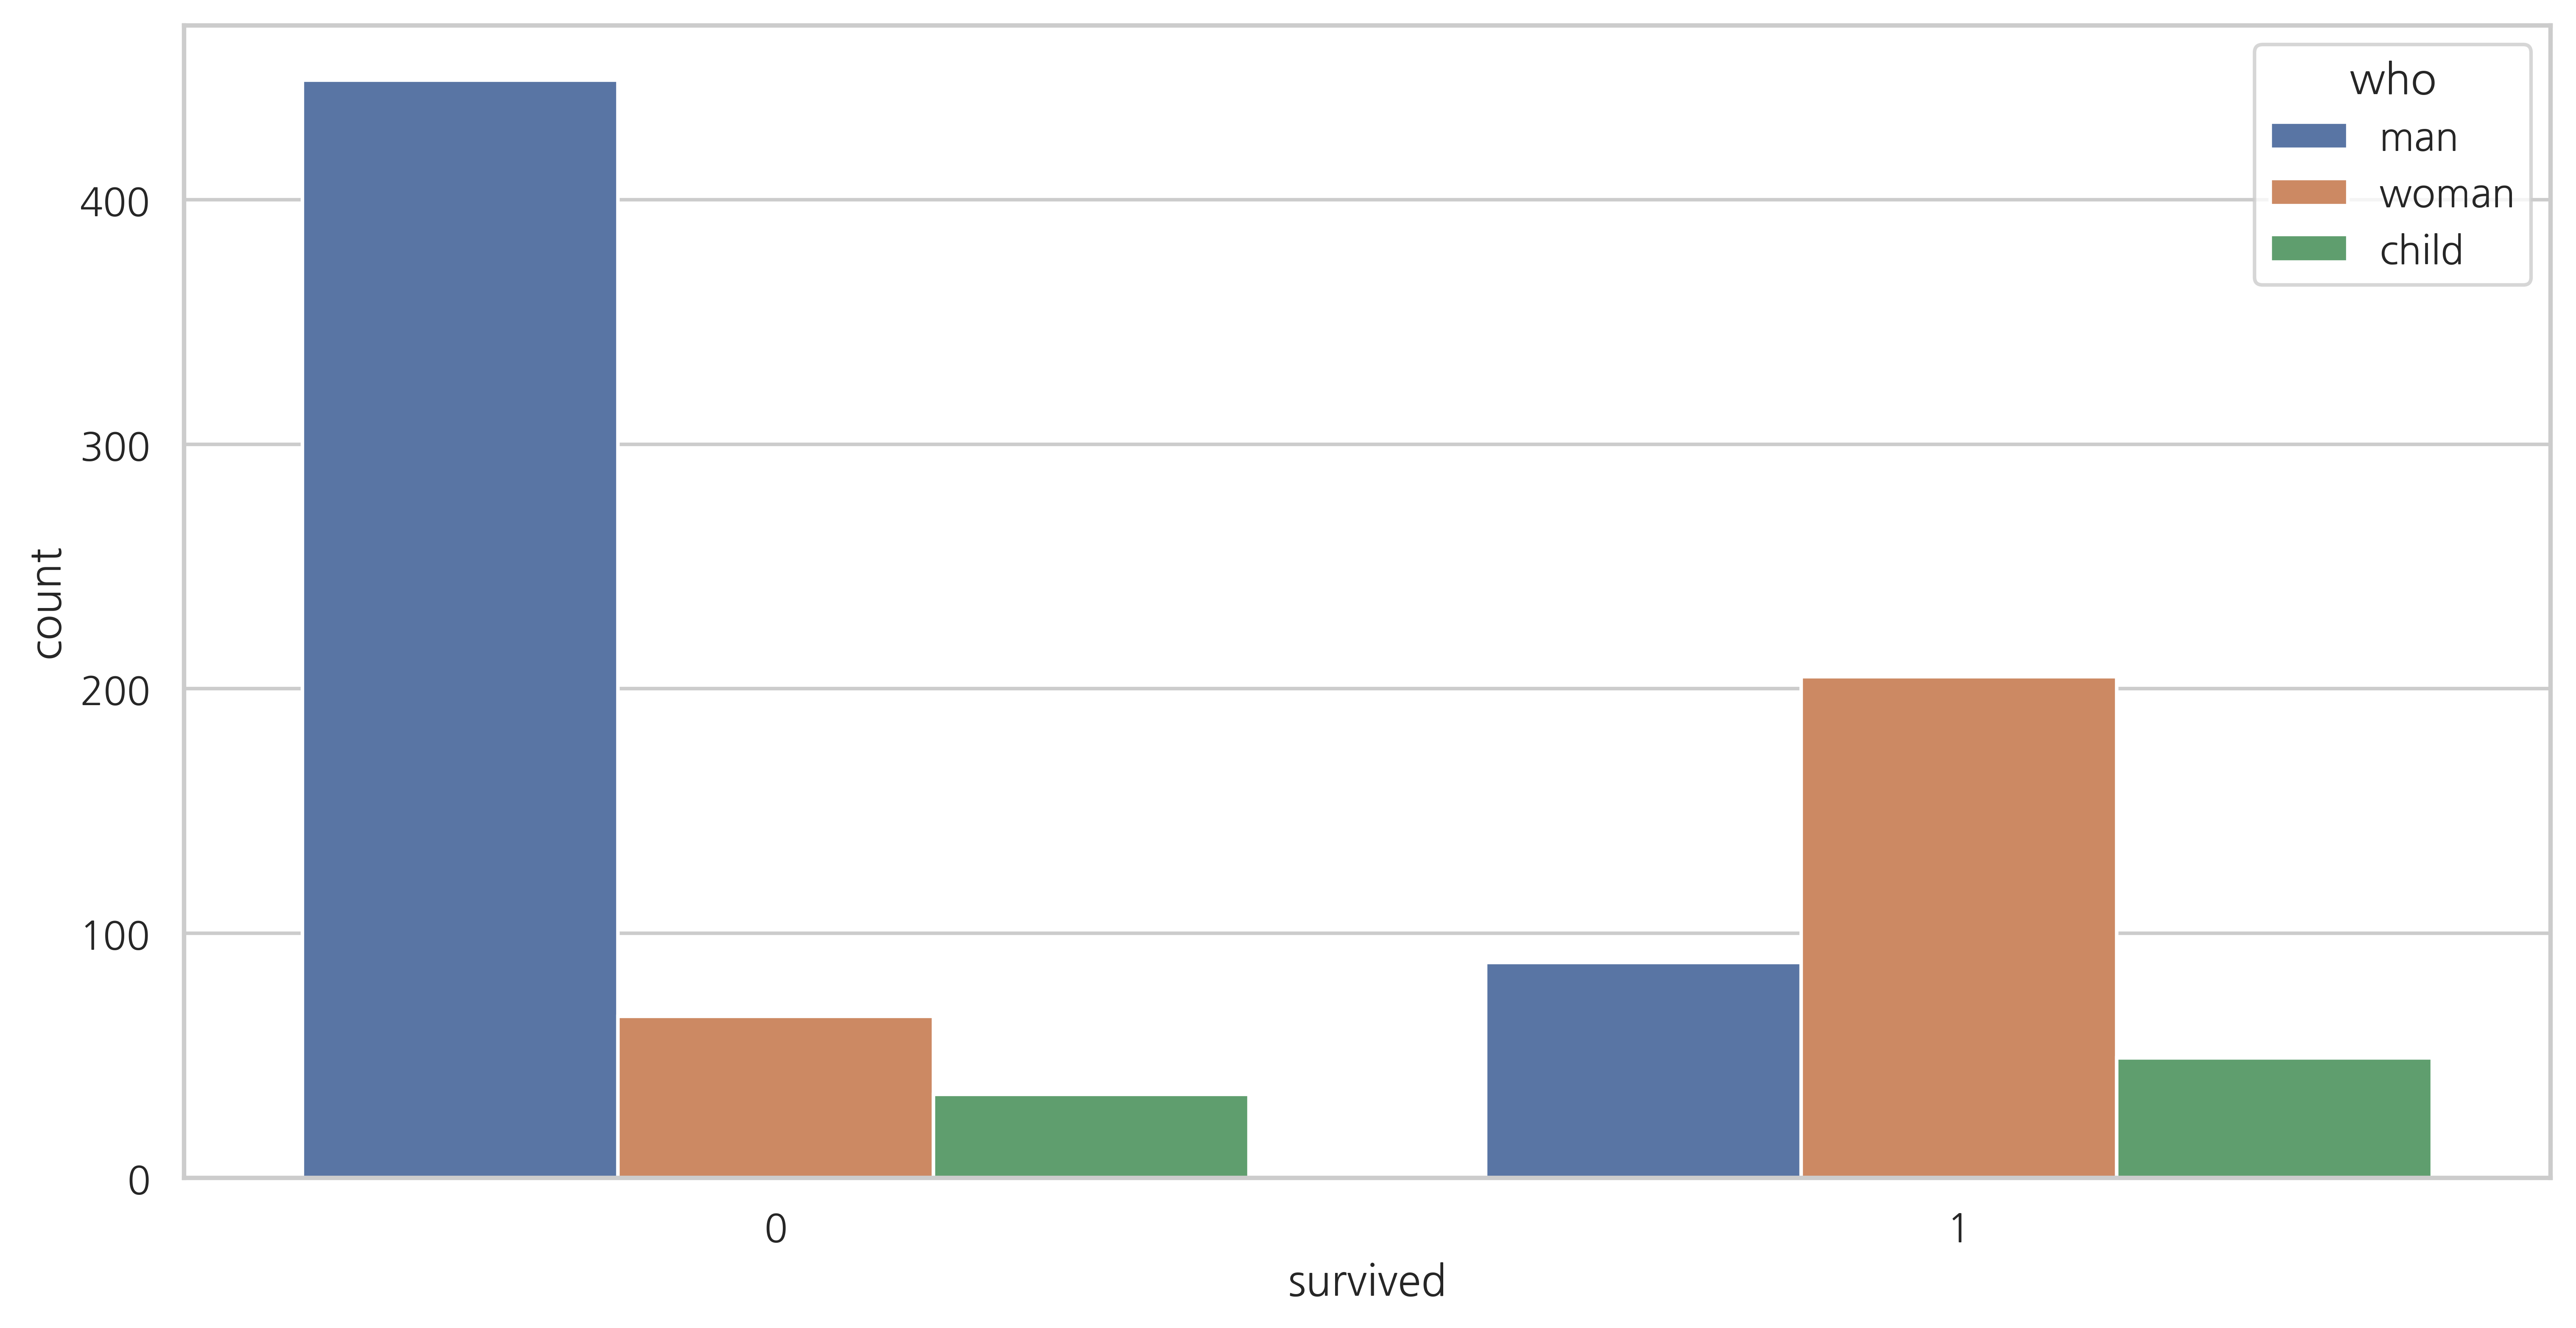

In [14]:
# who(hue) 변수별로 survived(x)한 사람의 수를 count하여 시각화 (seaborn 사용) 
sns.countplot("survived", hue="who", data = df)

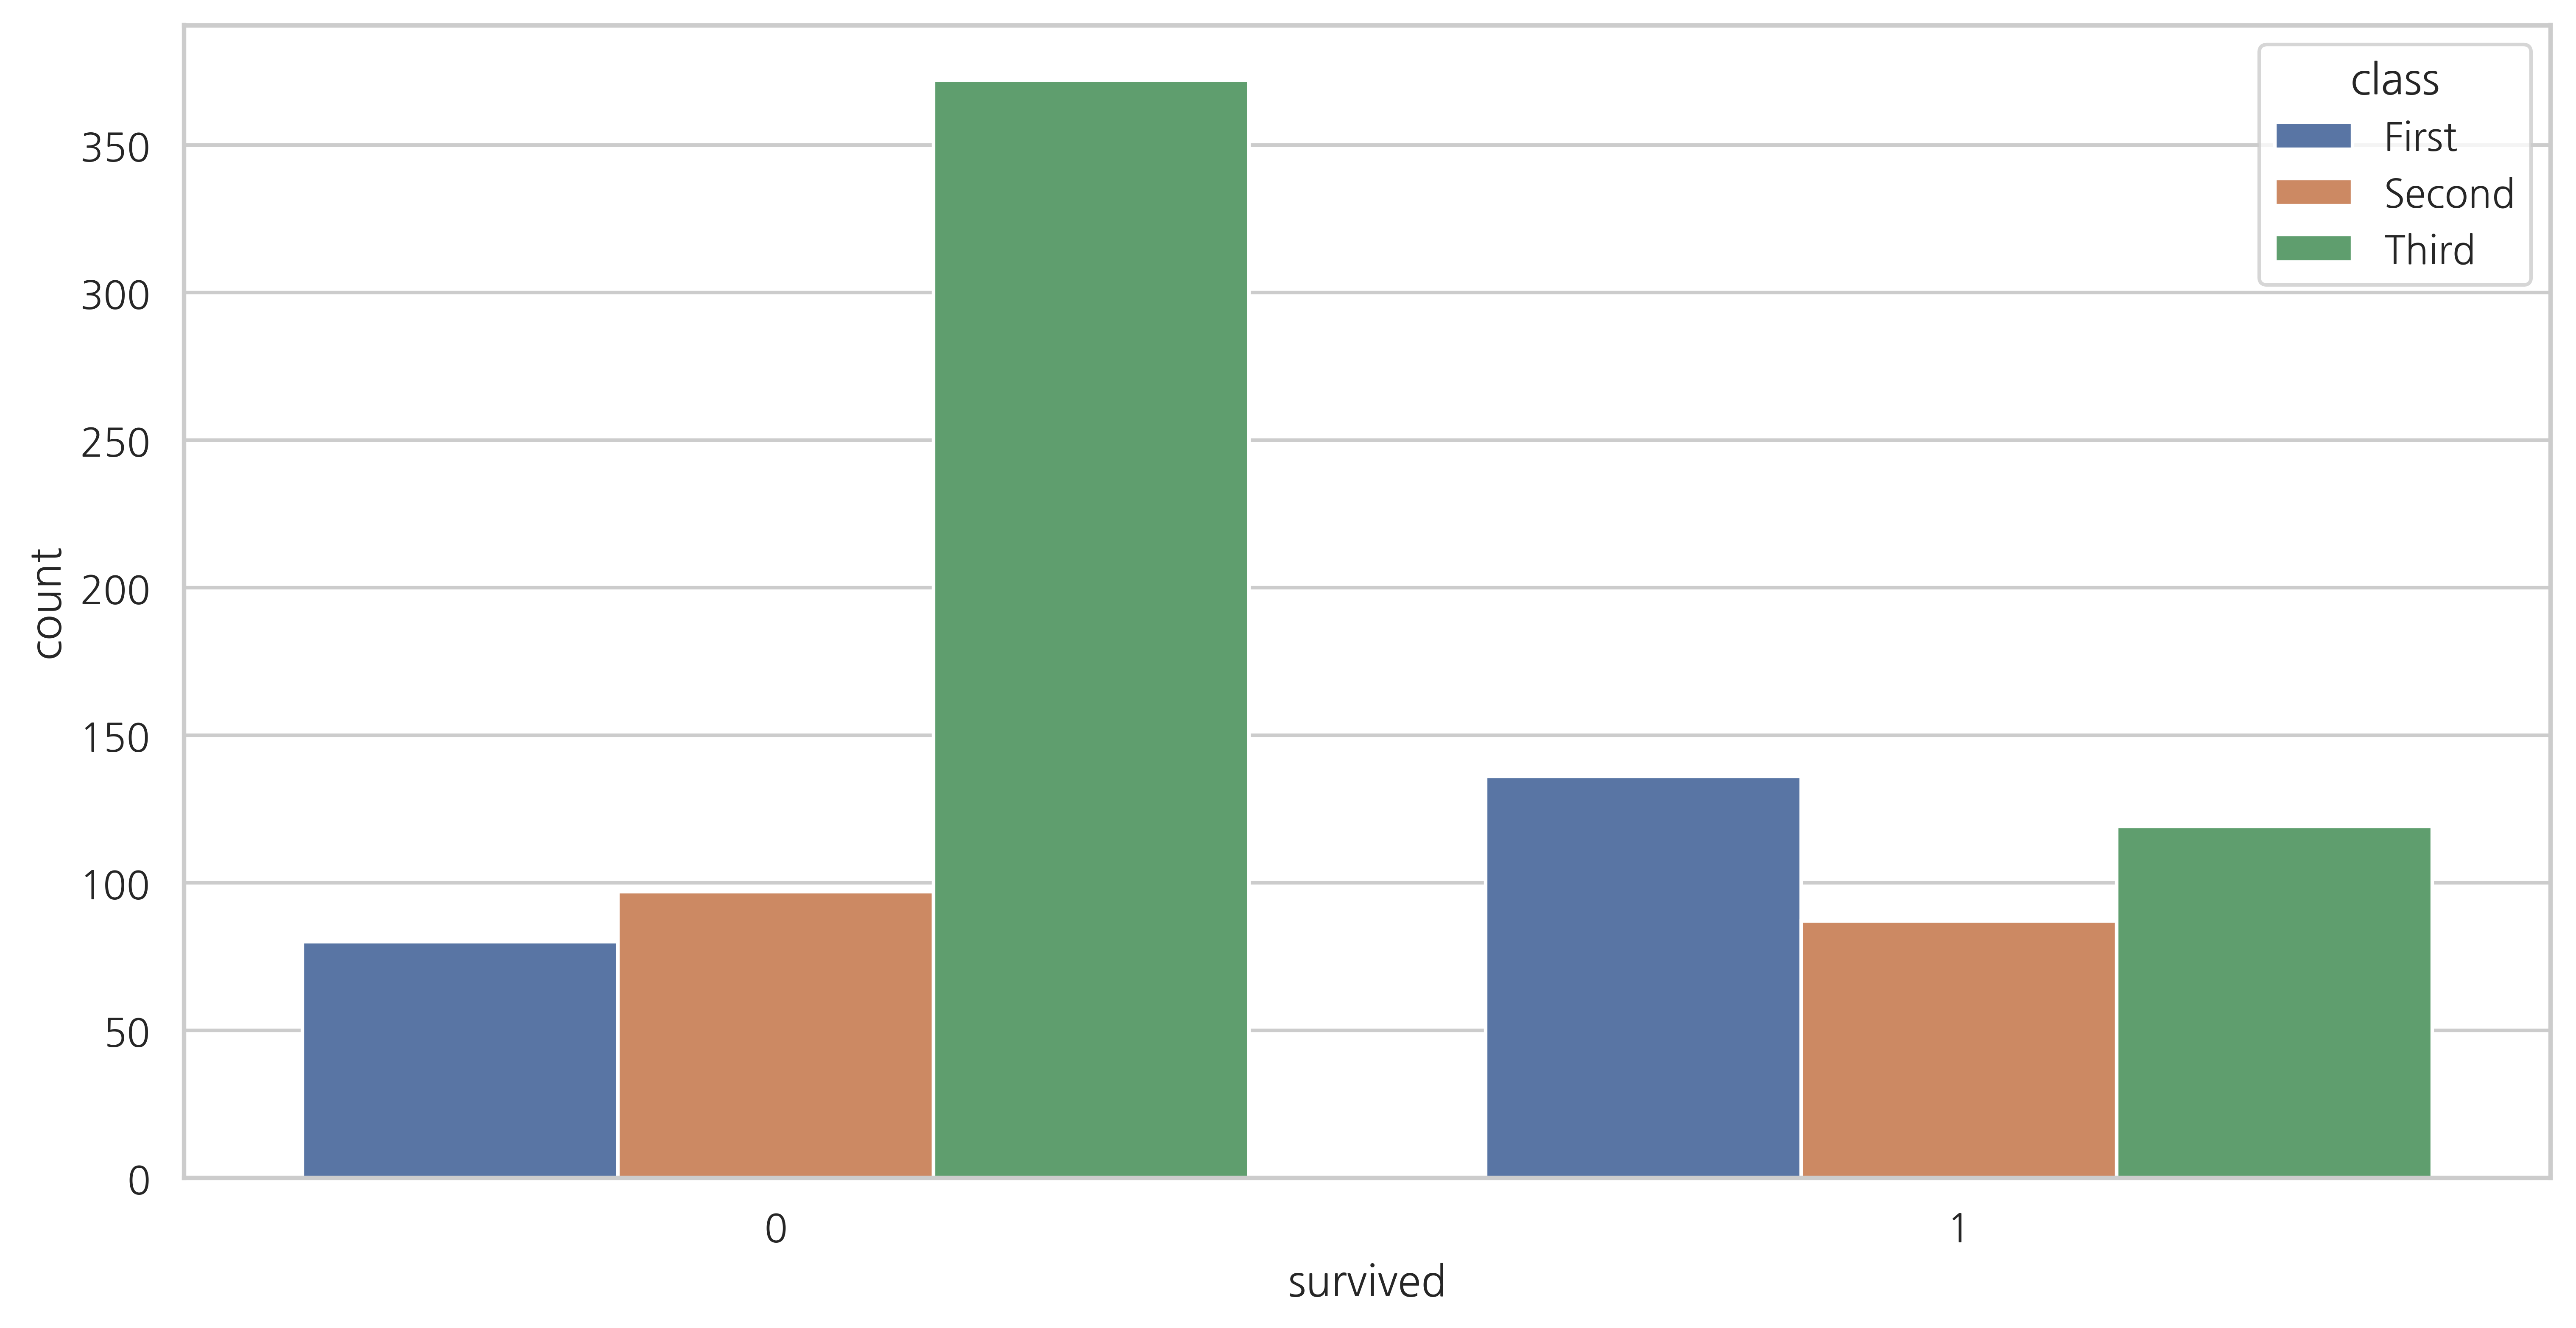

In [15]:
# class 변수별로 survived한 사람의 수를 count하여 시각화 (seaborn 사용) 
sns.countplot("survived", hue="class", data = df)
plt.show()

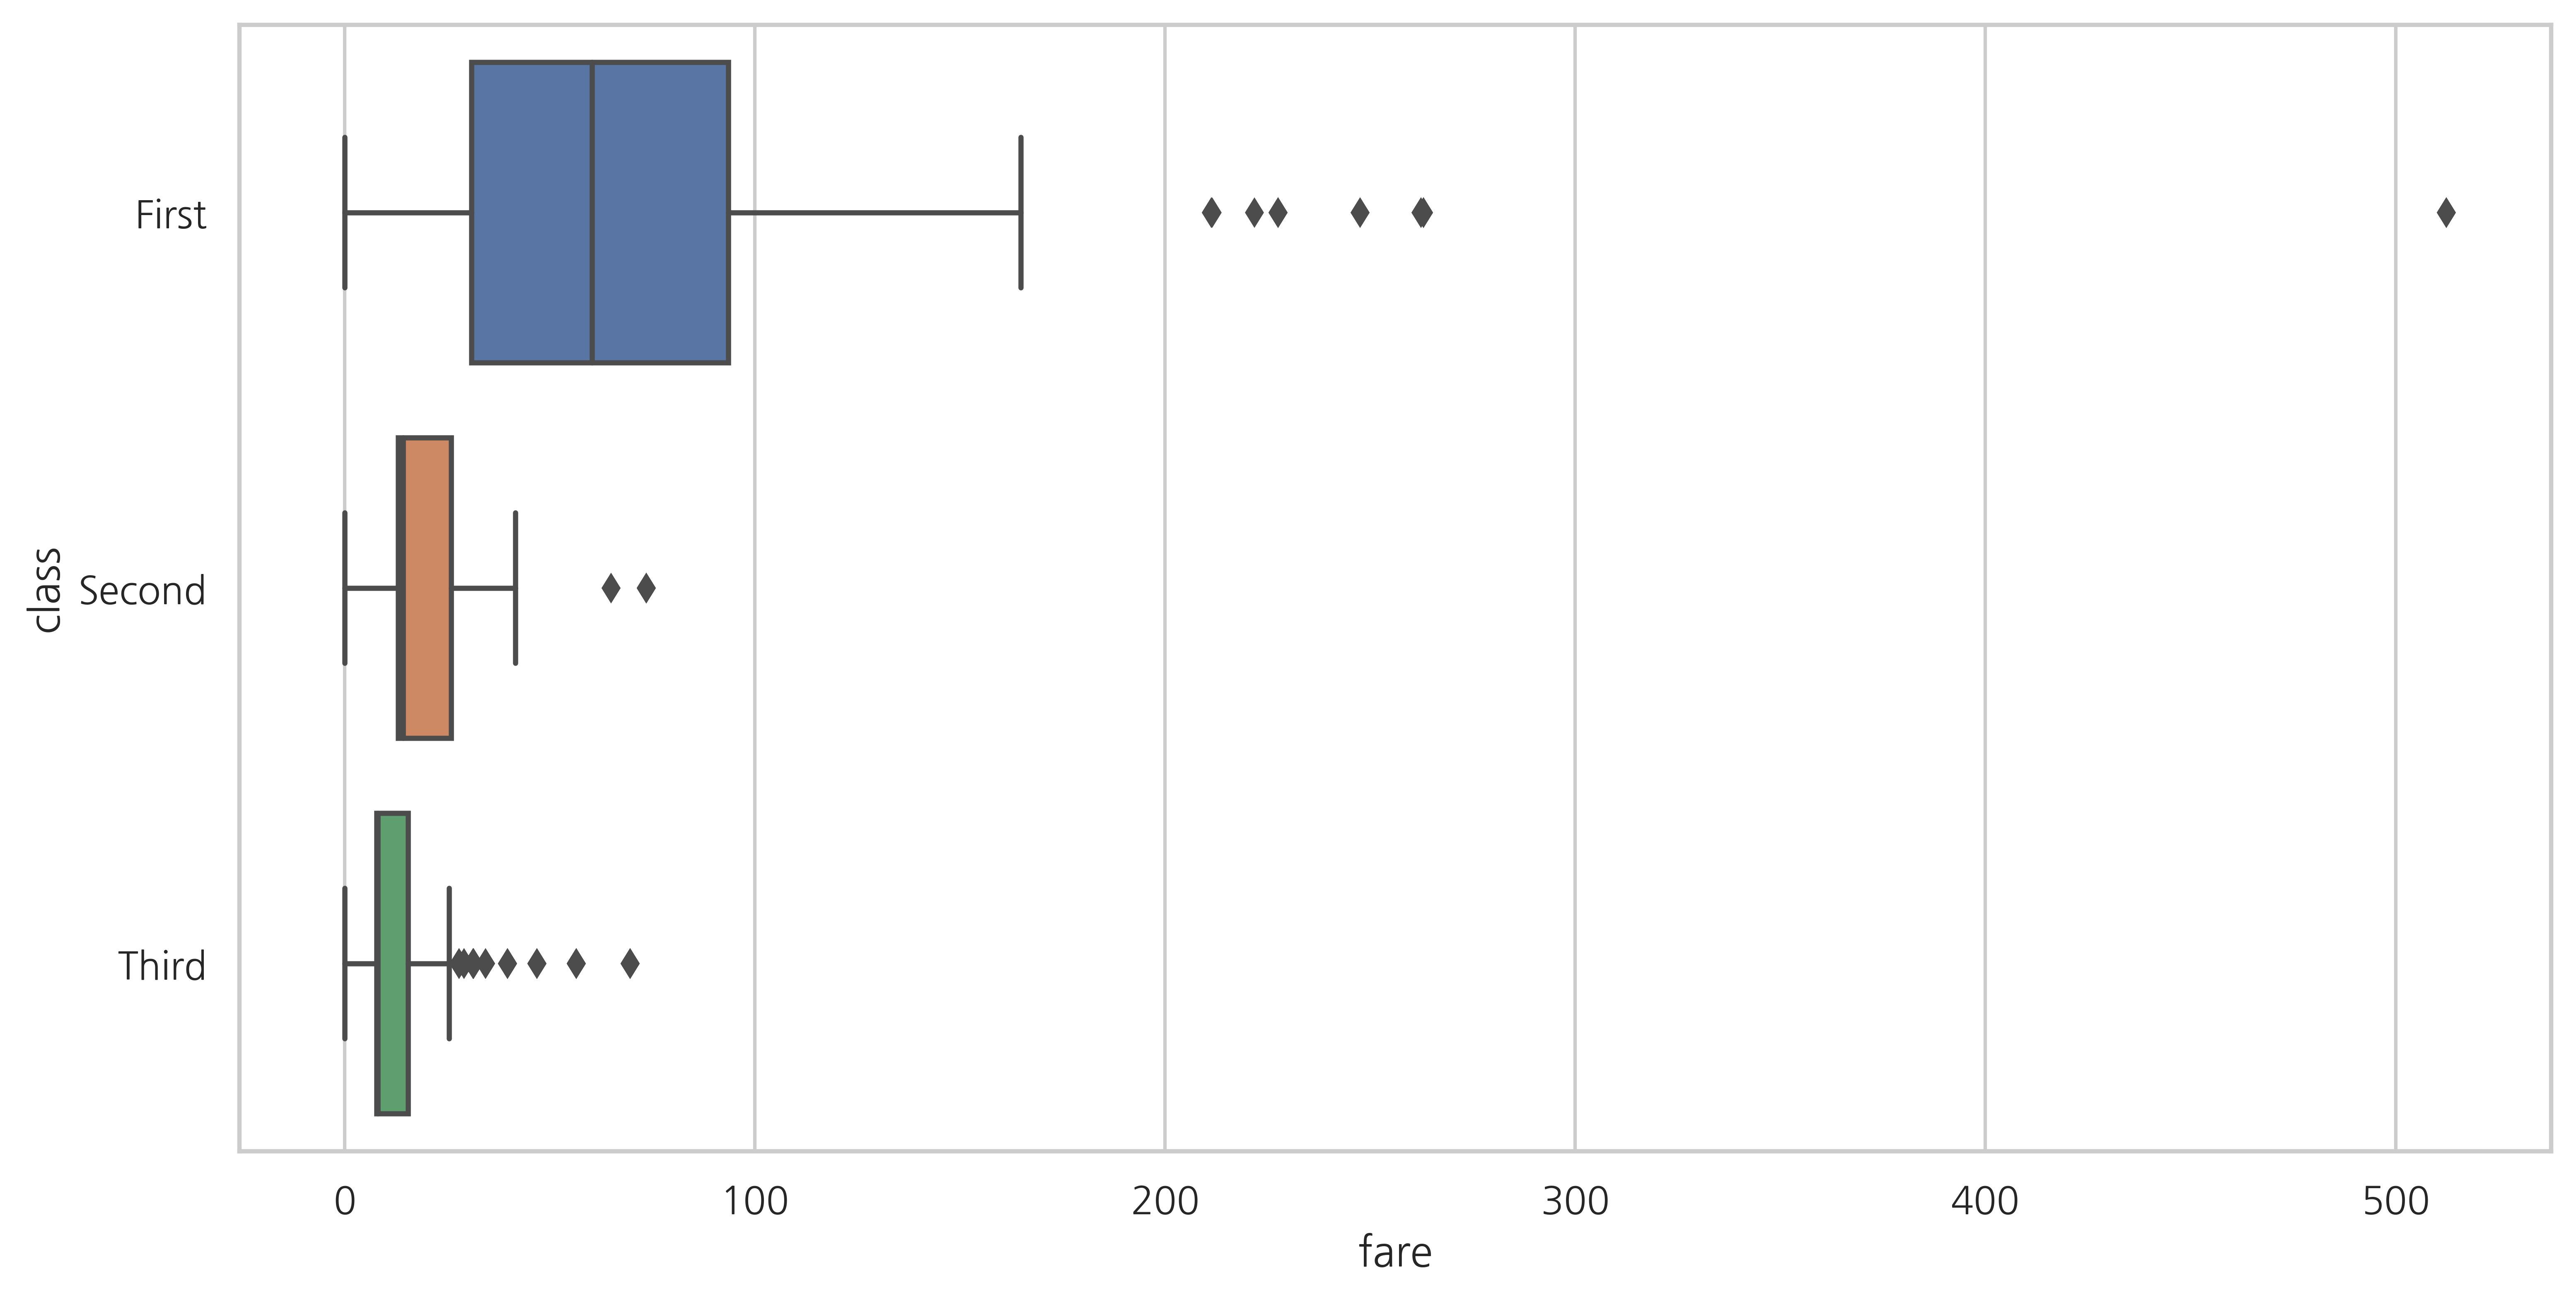

In [16]:
# class 변수별 fare값의 분포를 boxplot으로 시각화 (seaborn 사용) 
sns.boxplot(x="fare", y="class", data=df)

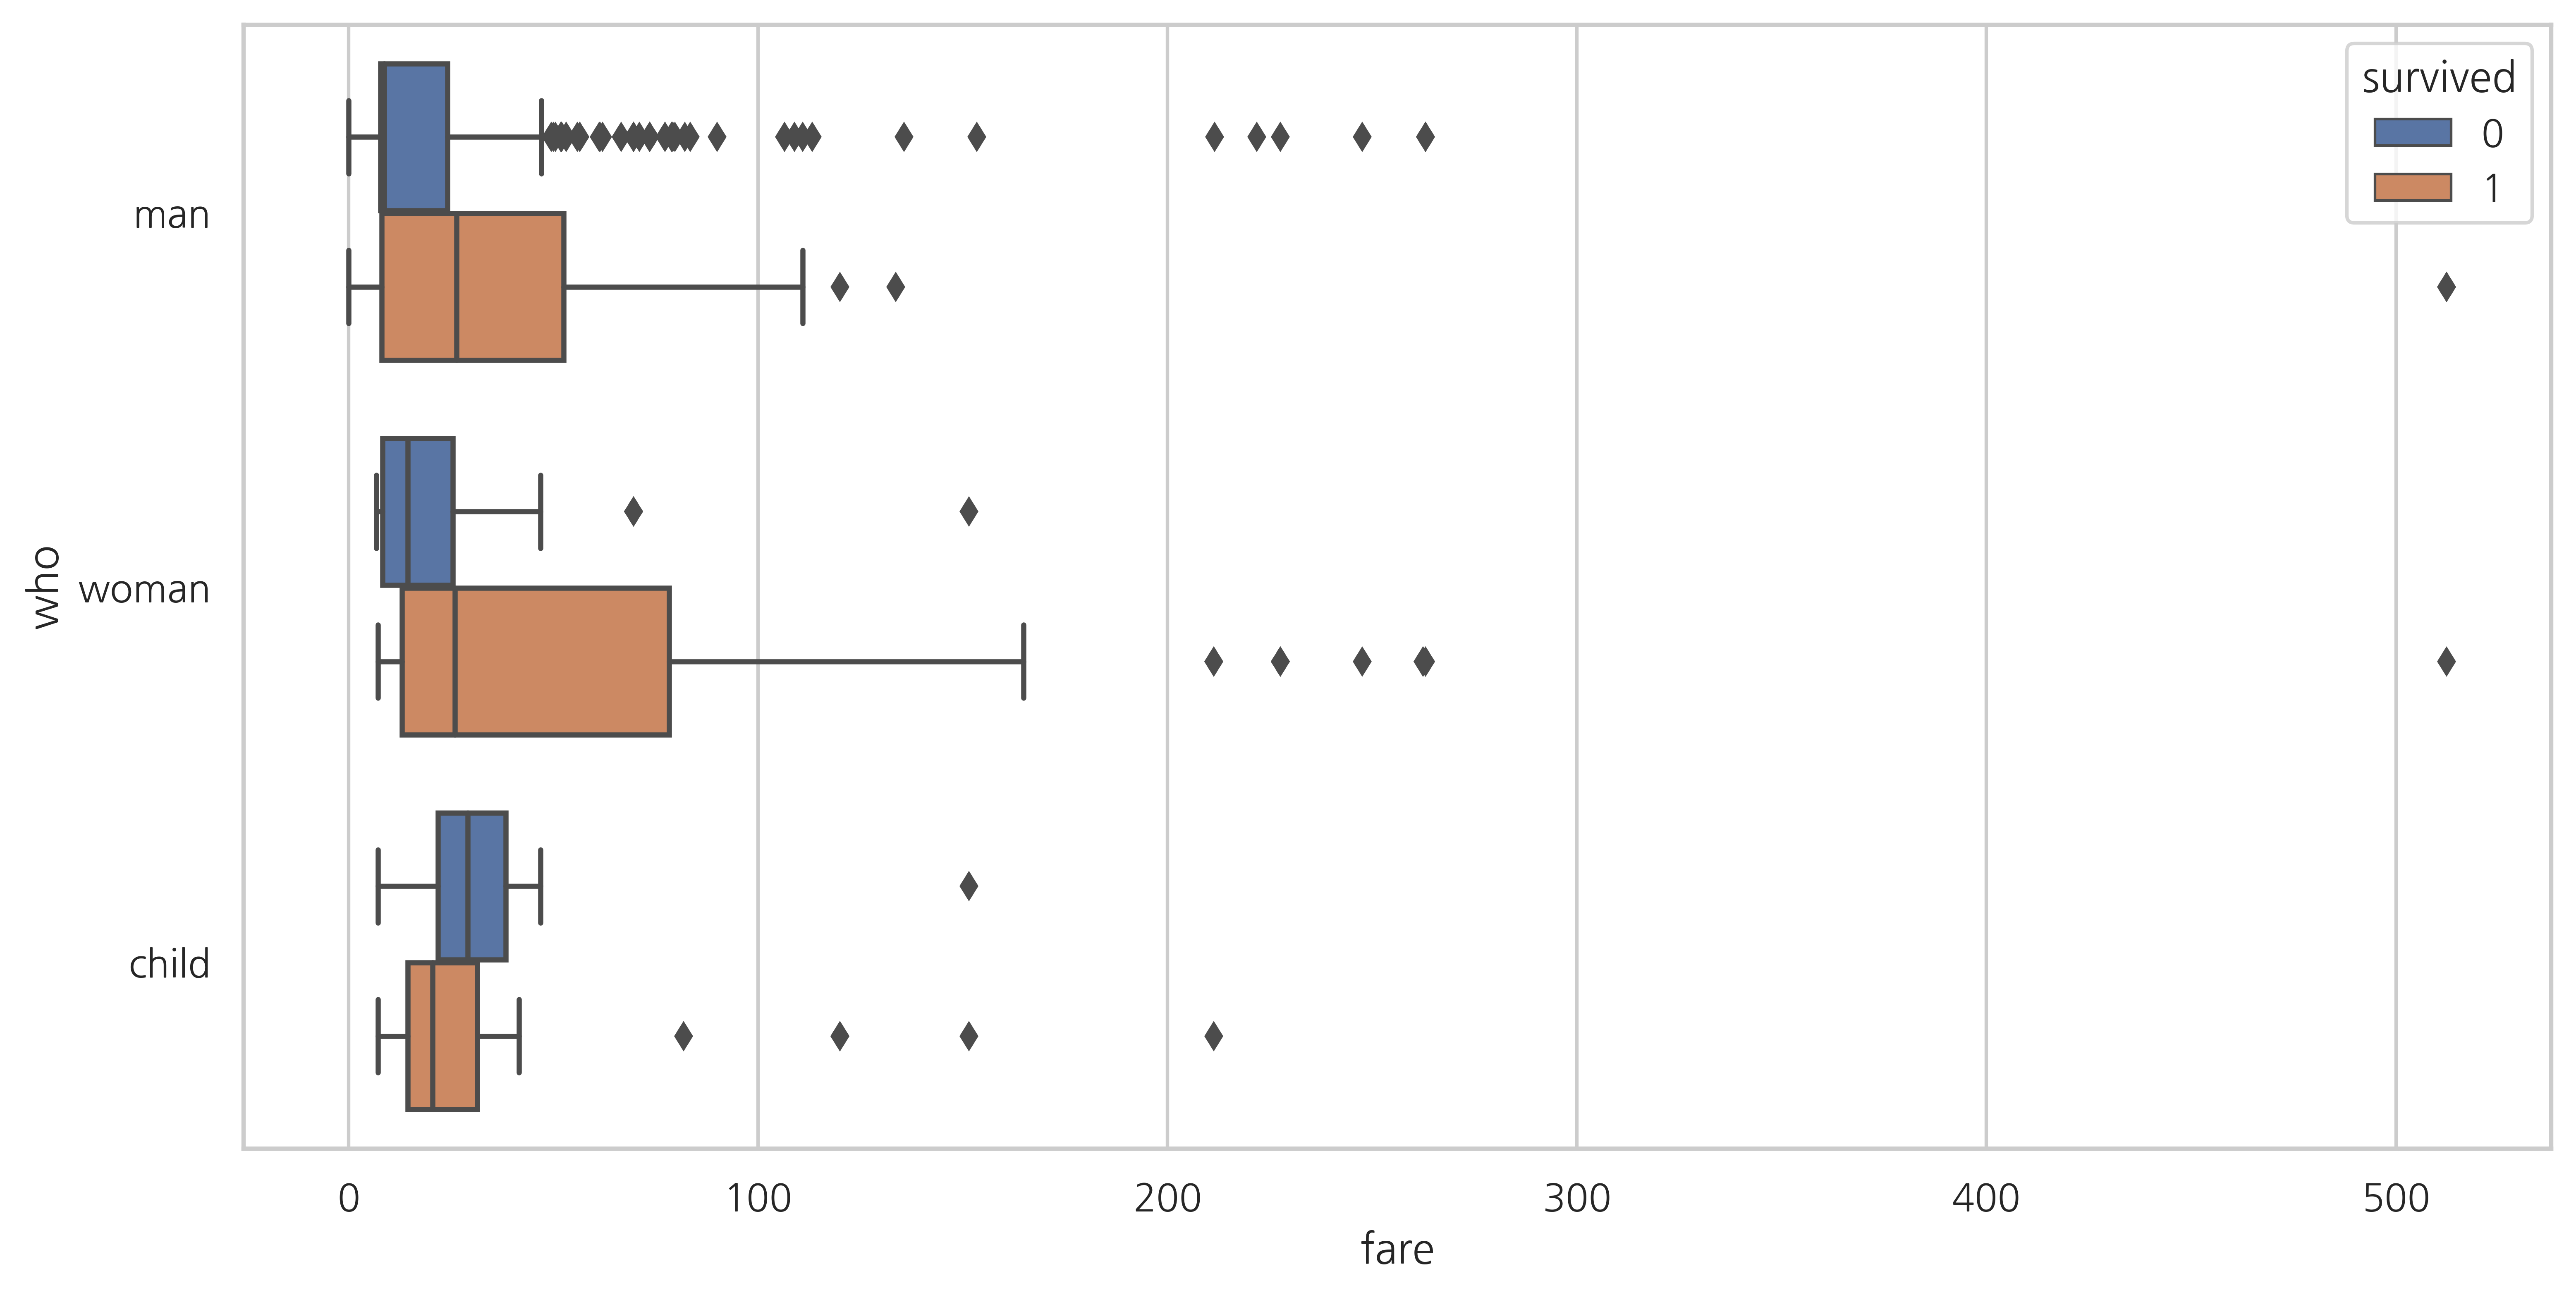

In [17]:
# who 변수(x)별 fare값의 분포(y)를 boxplot으로 시각화. 이떄 who변수별로 survived(hue)에 해당하는 두개의 boxplot이 생성되게 (seaborn 사용) 
sns.boxplot(x="fare", y="who", hue="survived", data=df)

In [18]:
# df에서 who 중 child(어린아이들)에 해당하는 데이터만 뽑은 후, 뽑은 데이터를 child_df라고 설정 
child_df = df[df["who"] == "child"]
# child_df의 행과 열 크기 확인
child_df.shape

(83, 6)

In [19]:
# child_df 자체의 인덱스 재정렬 진행.(reset_index 함수 사용. 이때 index 열은 추가 X)
child_df = child_df.reset_index(drop = True)
# child_df의 앞의 3개 행만 확인
child_df.head(3)

,survived,sex,age,fare,class,who
0,0,male,2.0,21.0750,Third,child
1,1,female,14.0,30.0708,Second,child
2,1,female,4.0,16.7000,Third,child


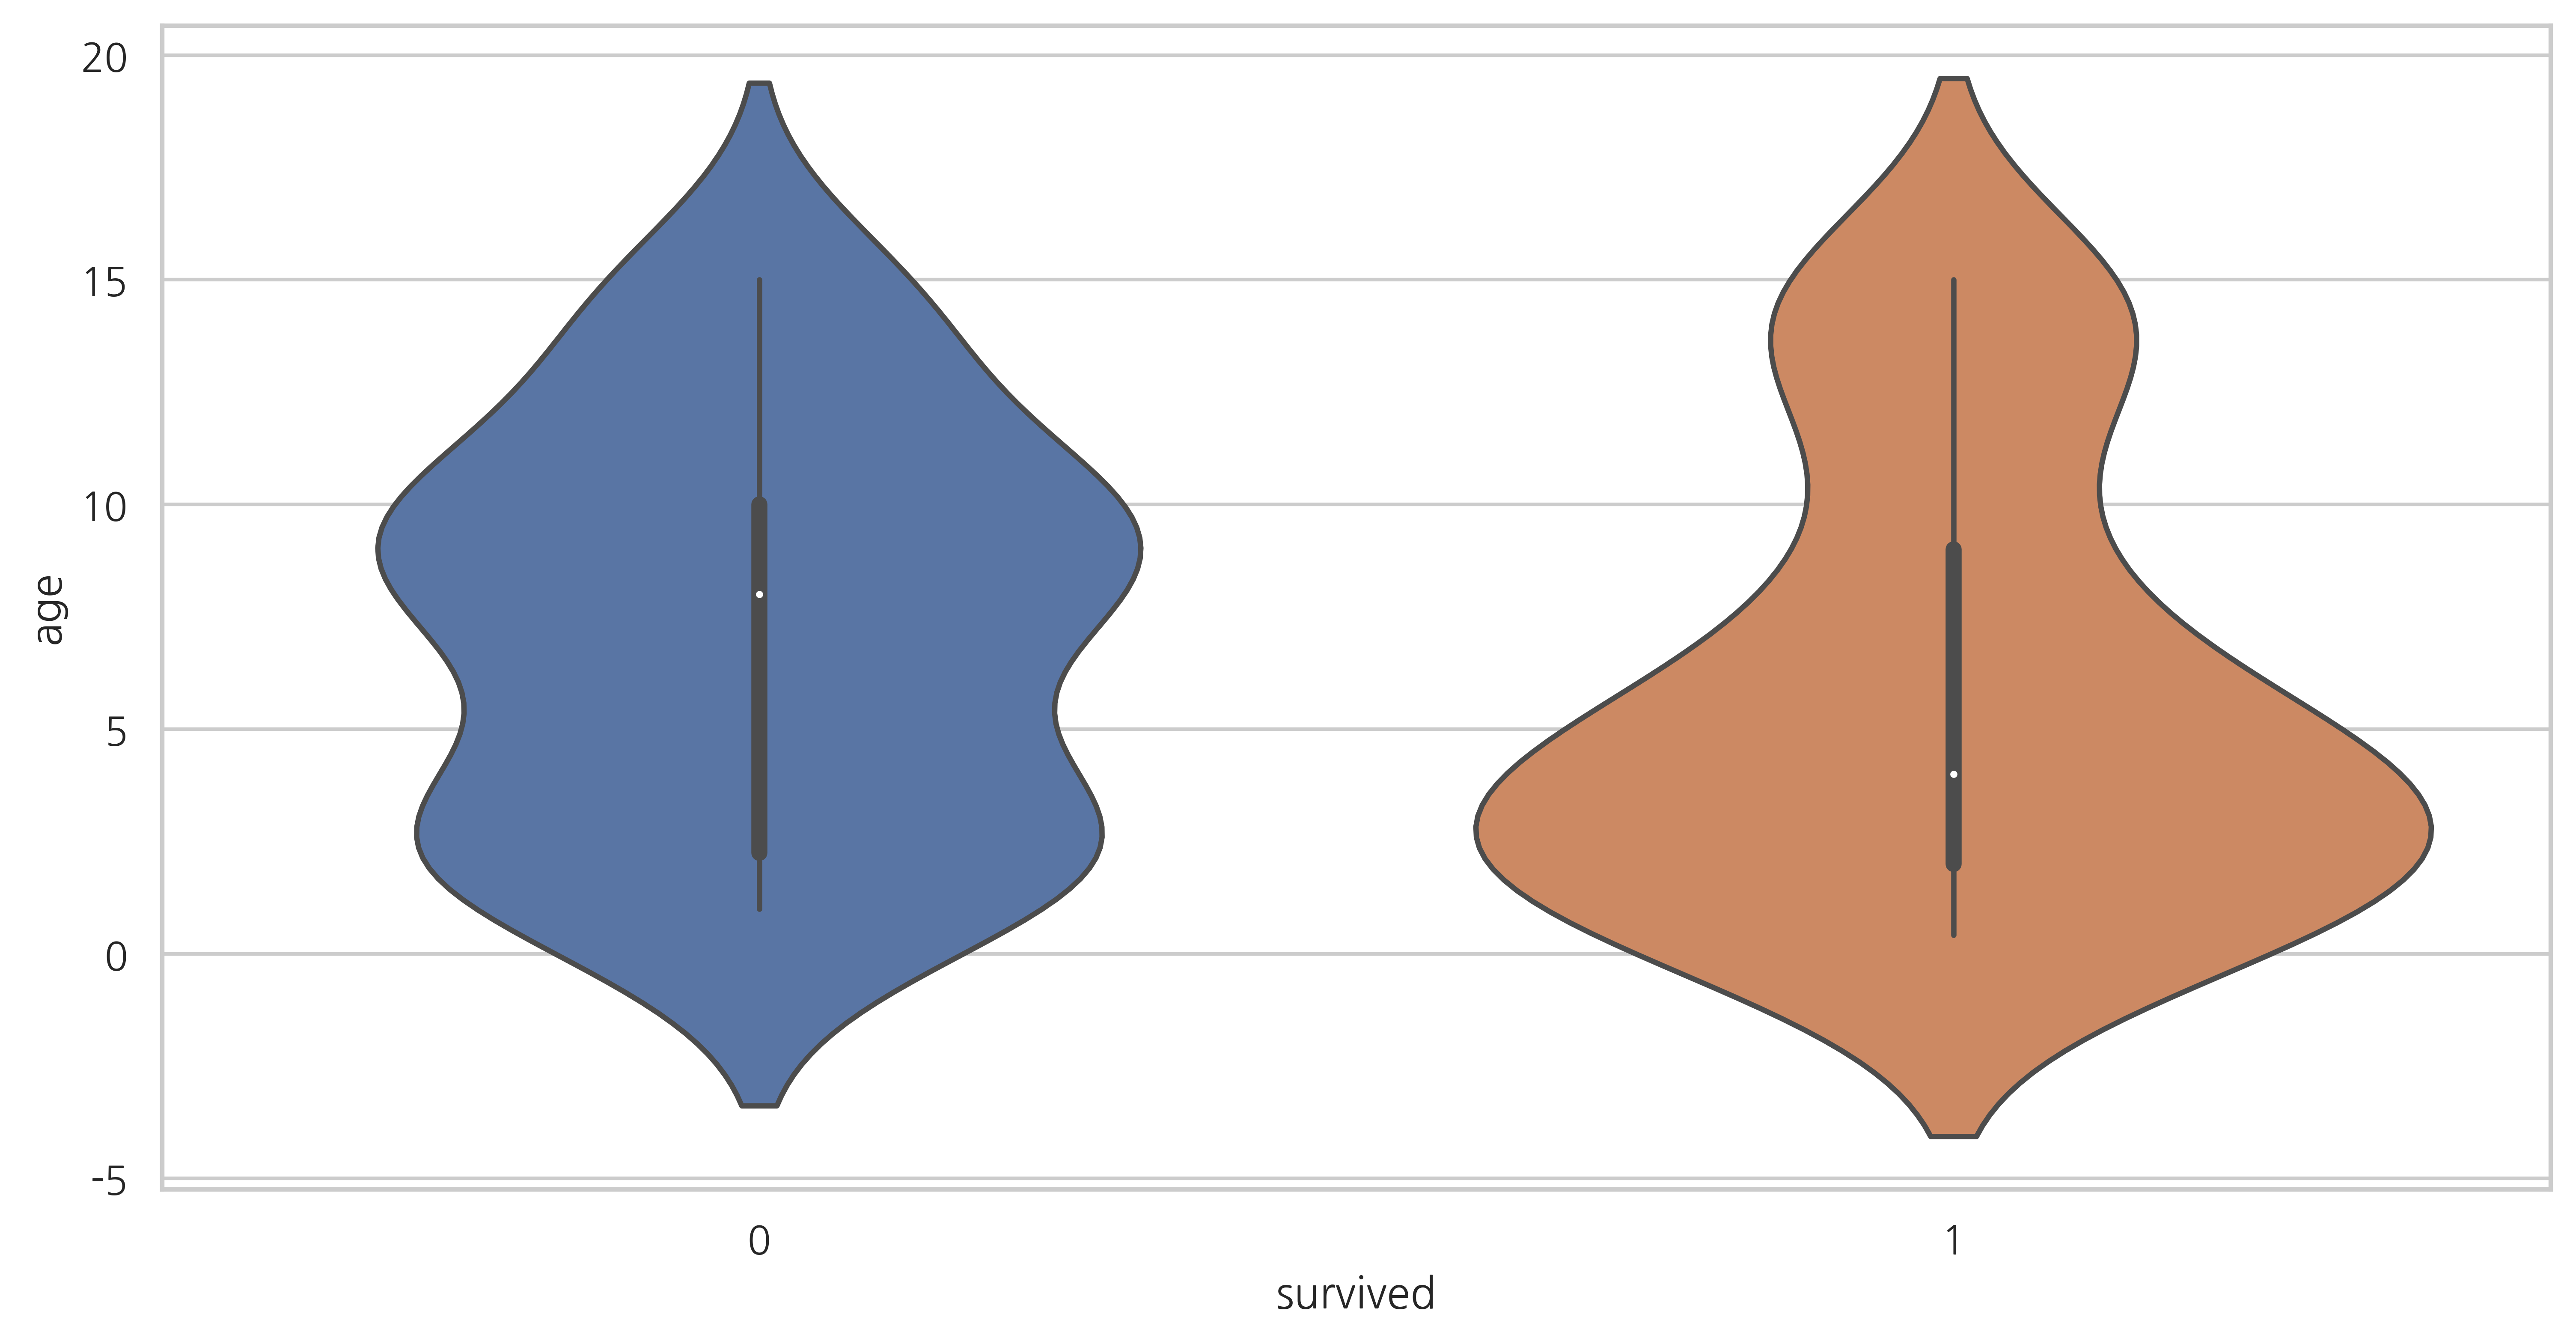

In [20]:
# child_df에서 survived별 age를 violinplot으로 나타냄 (seaborn 사용. violinplot 사용법 및 내용은 구글링으로 검색!ㅎㅎ)
sns.violinplot("survived", y = "age", data=child_df)

In [21]:
import seaborn as sns
sns.__version__

'0.11.2'

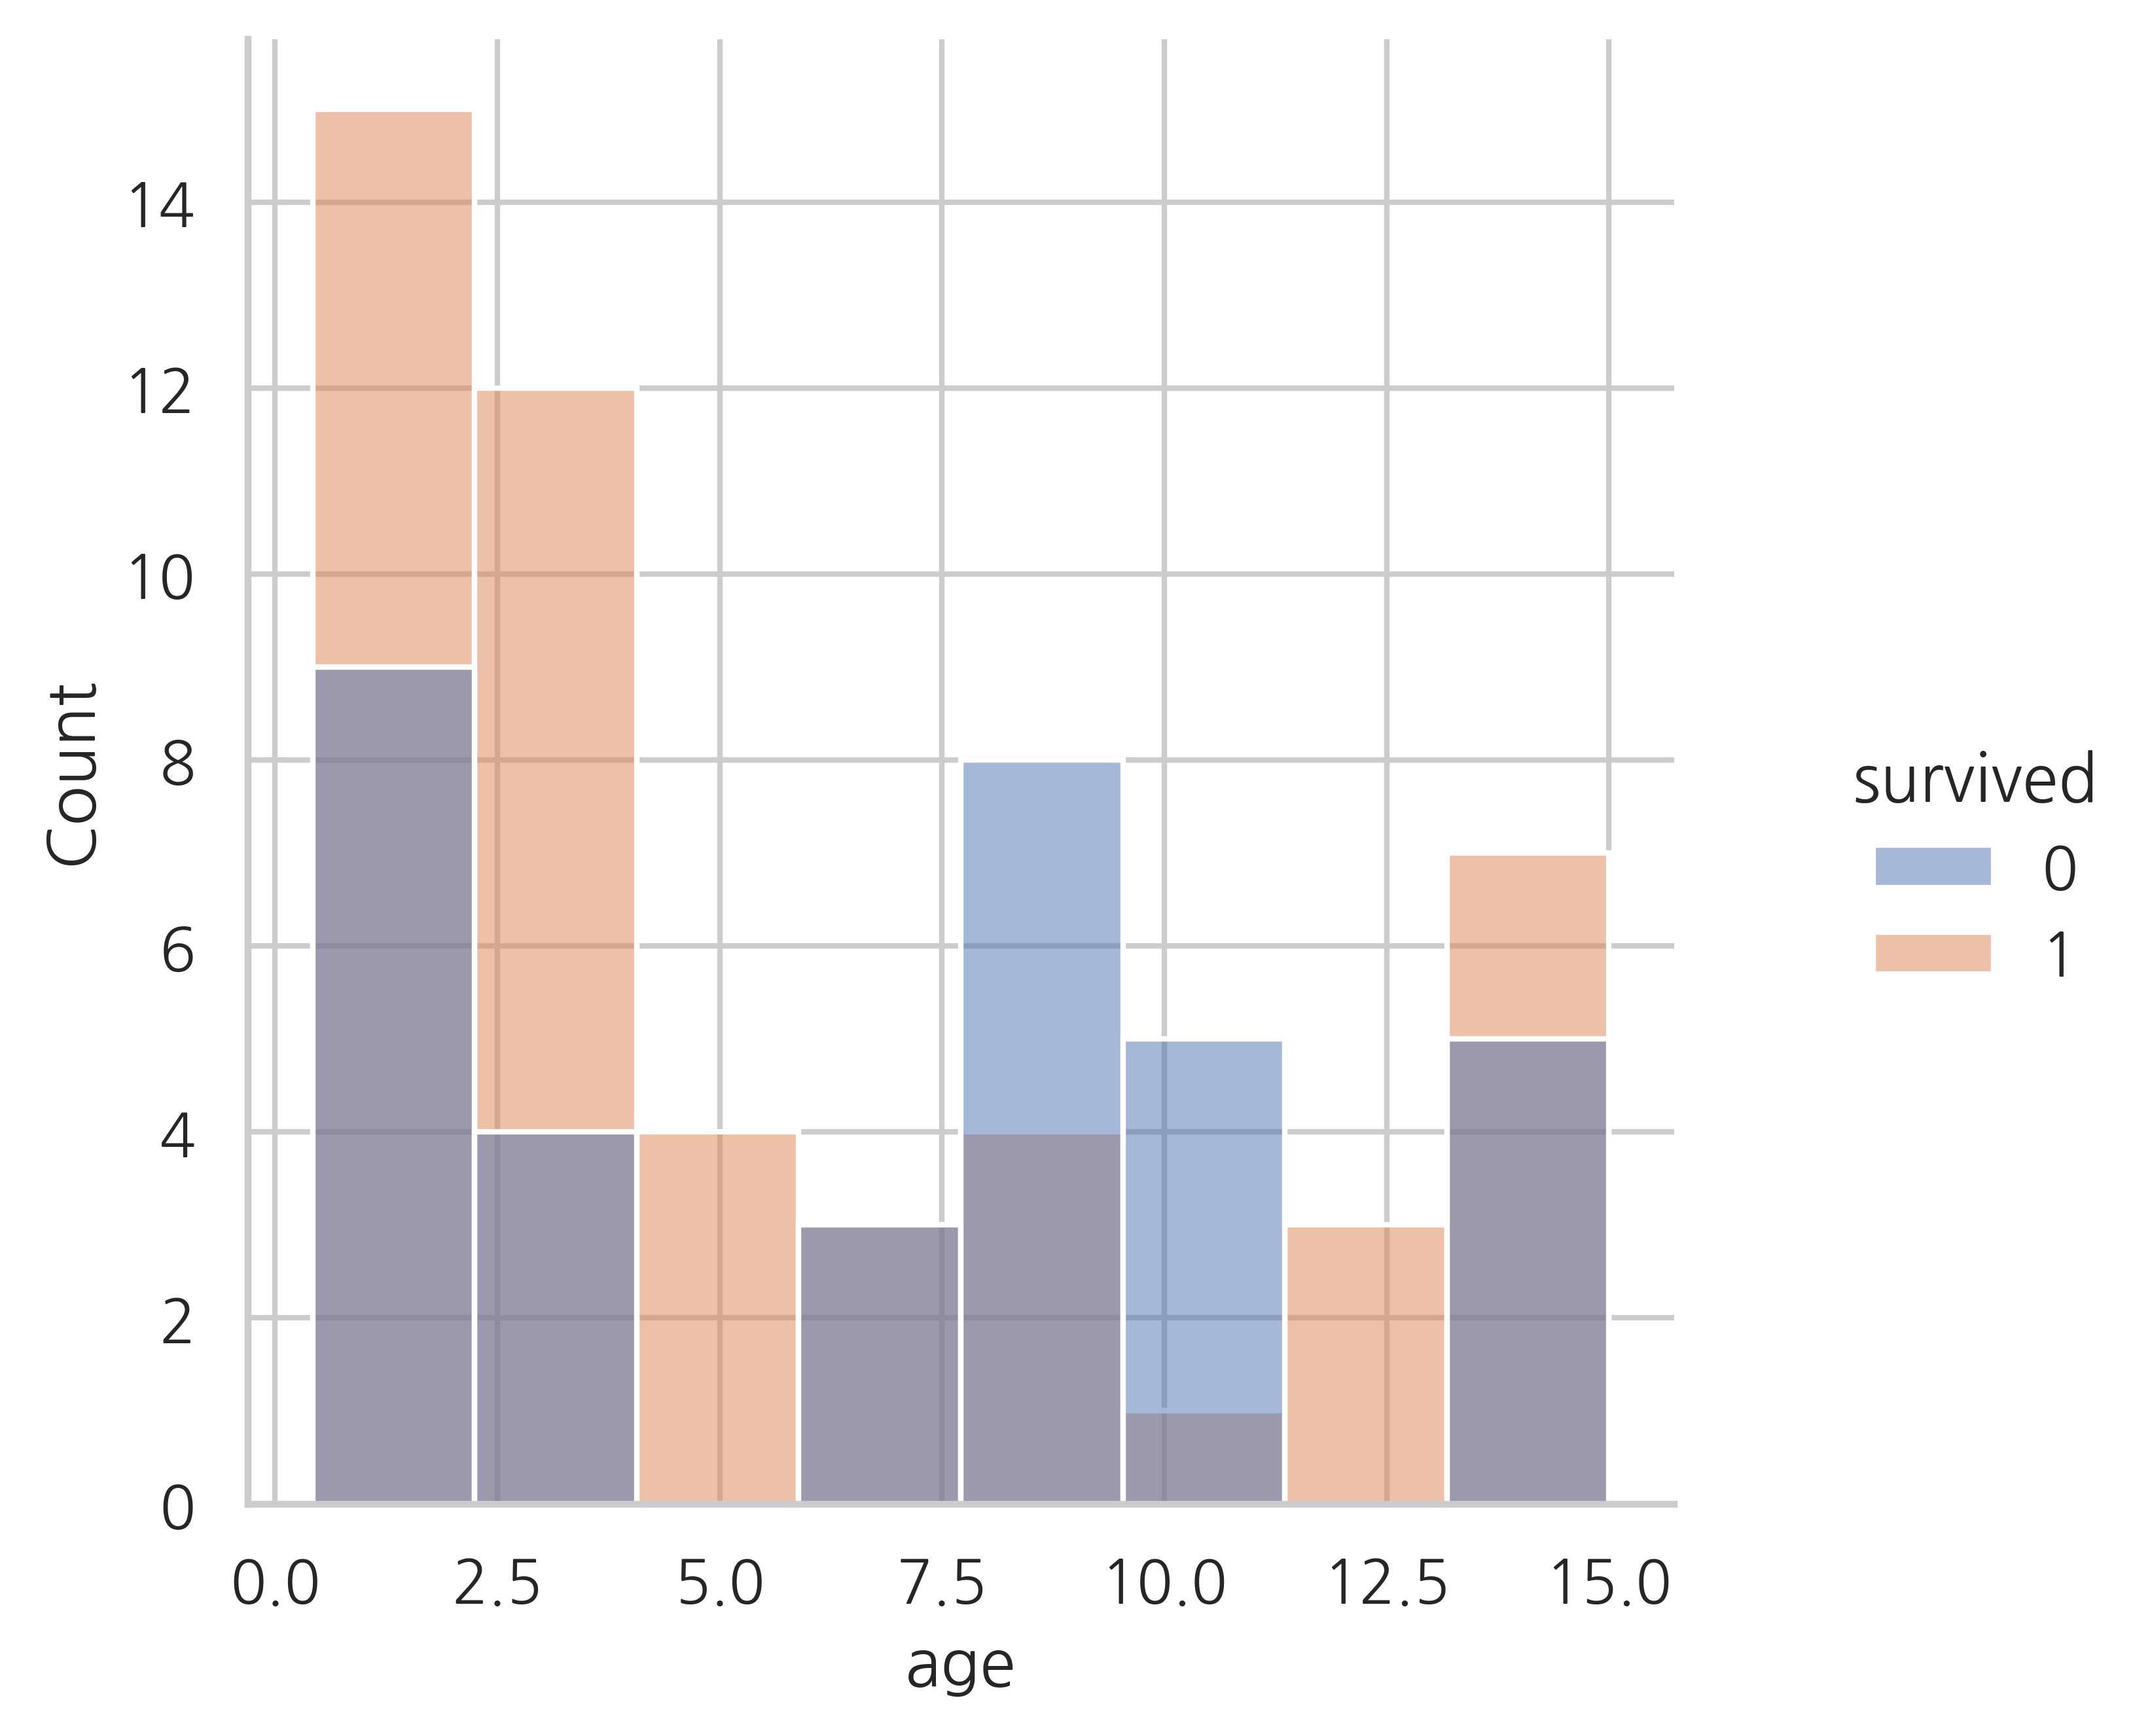

In [40]:
# child_df에서 survived별 age를 displot으로 나타냄. (seaborn 사용)
sns.displot(x='age',hue='survived',data=child_df )

In [23]:
# 1/age의 제곱근(분자:1, 분모:age의 제곱근)에 해당하는 값을 child_df의 age_weight 이라는 열로 추가 (lambda와 apply 사용. 제곱근의 경우 numpy를 이용해 구할 수 있음)
child_df['age_weight']=child_df.age.apply(lambda x: np.sqrt(1/x))
# 추가한 후 child_df의 앞의 5개행만 확인 
child_df.head()

,survived,sex,age,fare,class,who,age_weight
0,0,male,2.0,21.0750,Third,child,0.707107
1,1,female,14.0,30.0708,Second,child,0.267261
2,1,female,4.0,16.7000,Third,child,0.500000
3,0,female,14.0,7.8542,Third,child,0.267261
4,0,male,2.0,29.1250,Third,child,0.707107


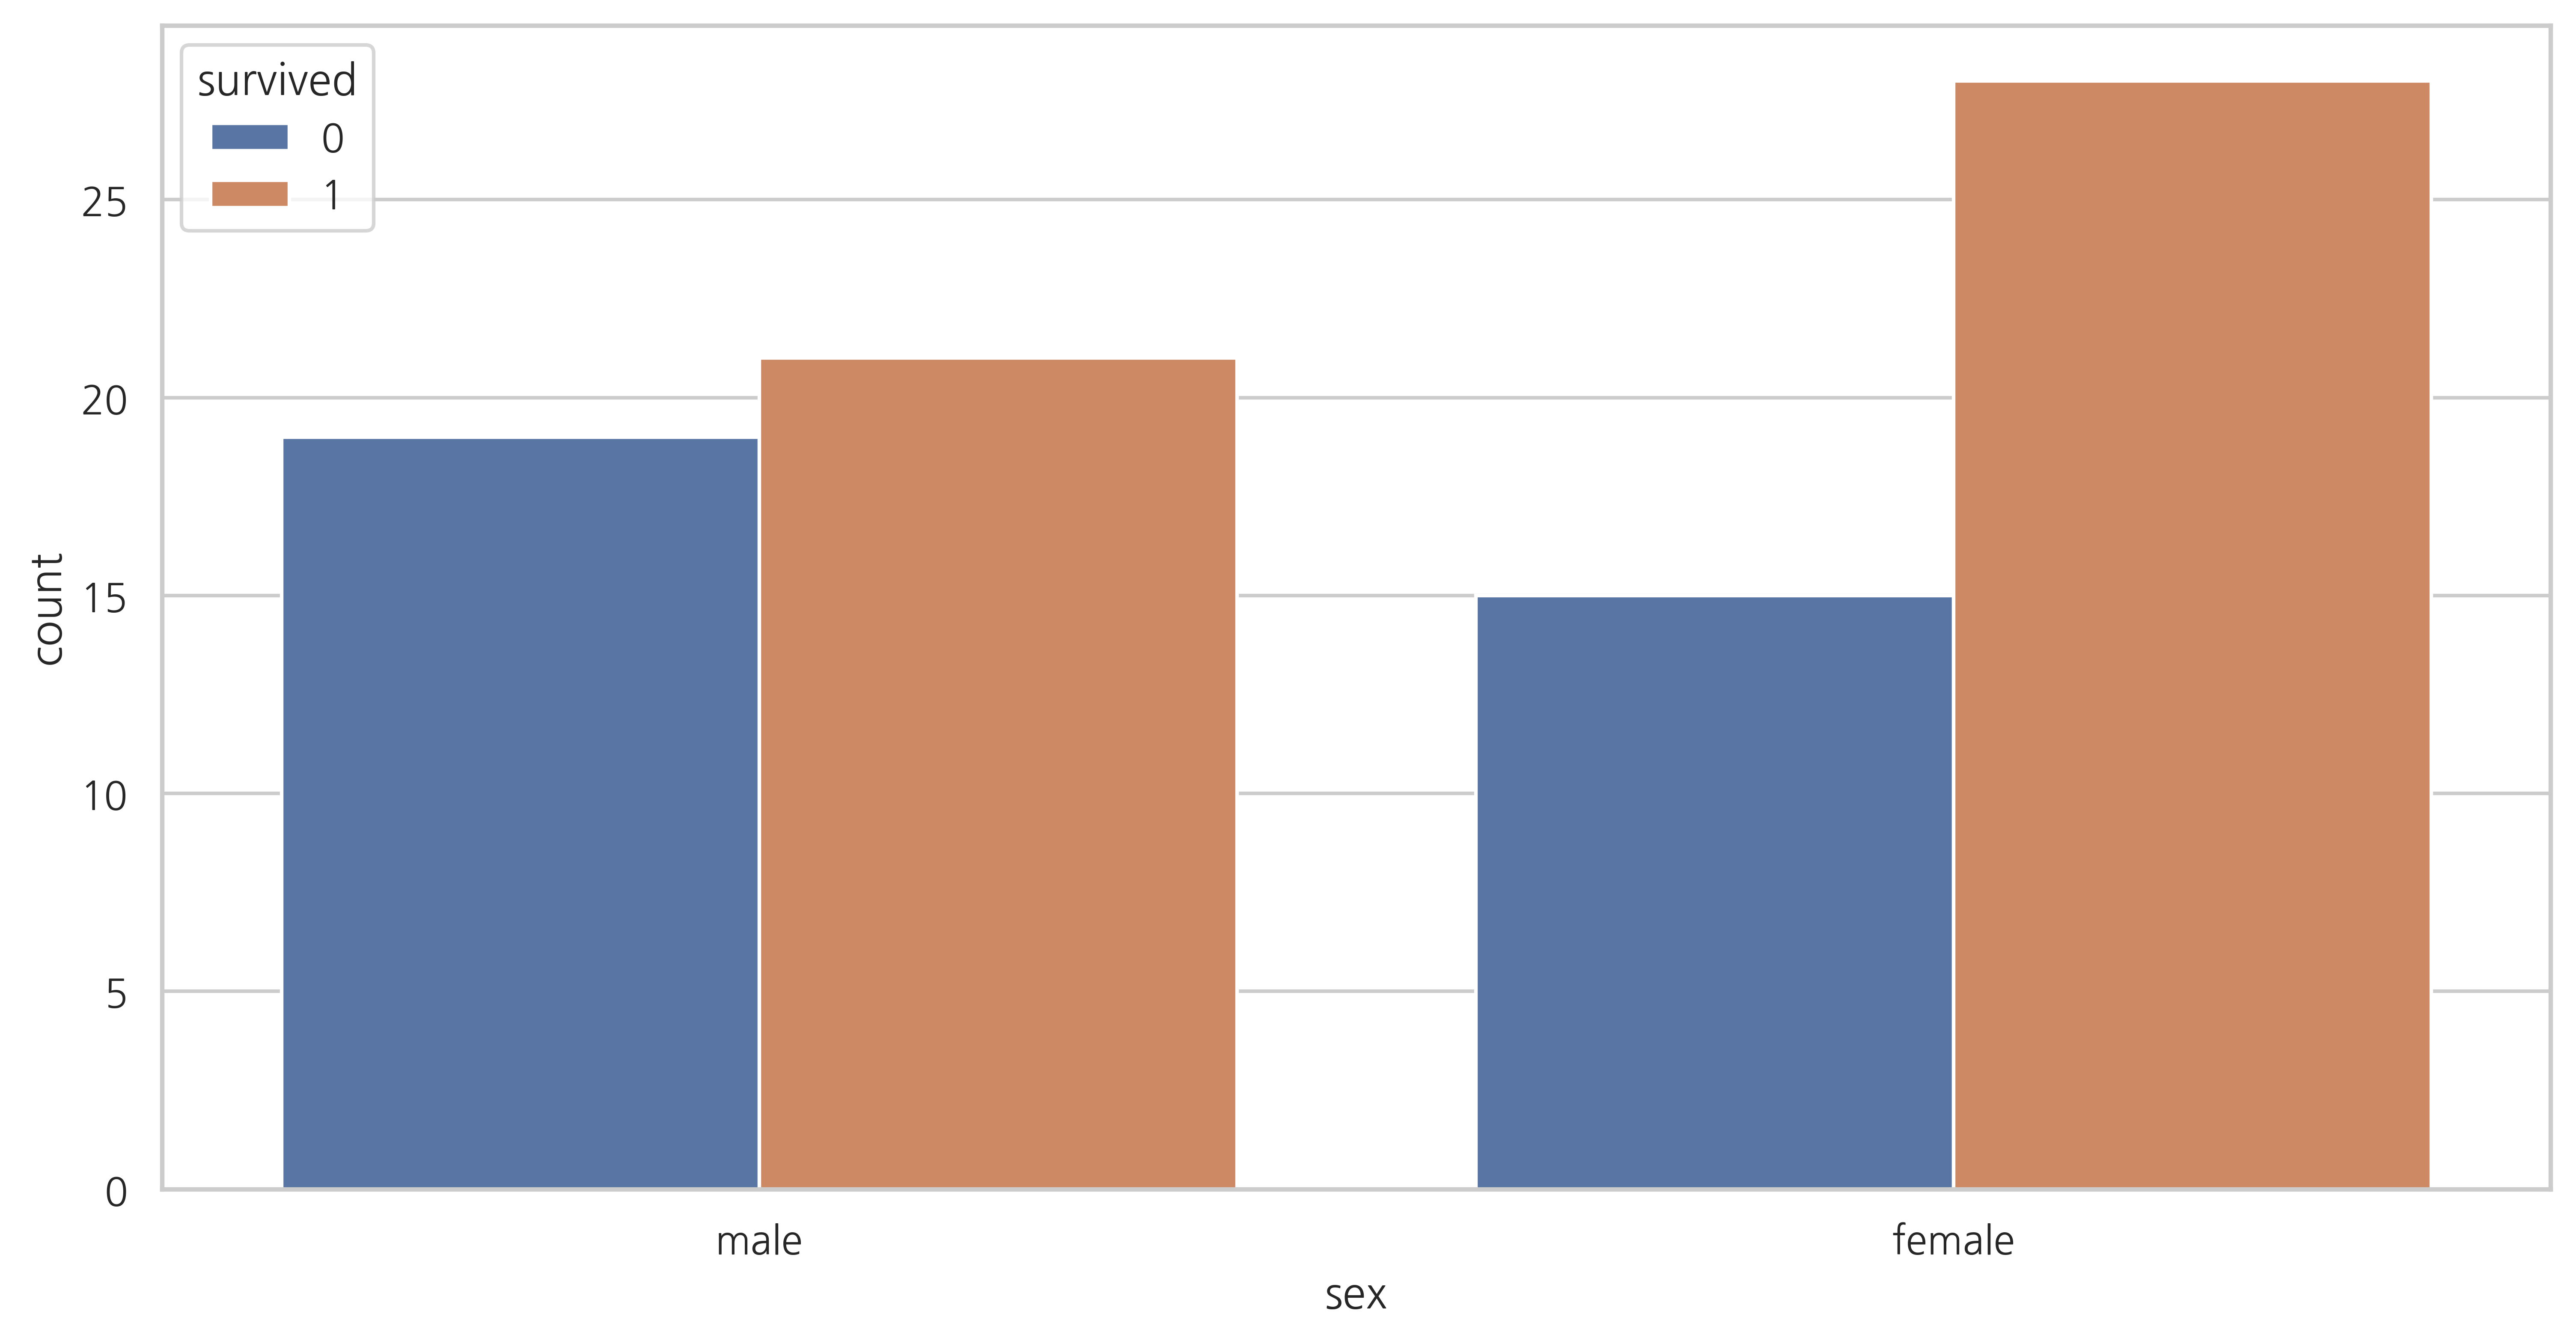

In [24]:
# child_df에서 sex 변수별 survived한 아이들의 수 count하여 시각화 (seaborn 사용) 
sns.countplot(x='sex',hue='survived' ,data=child_df)

In [33]:
# child_df에서 sex가 female인 경우 0.3, male인 경우 0을 값으로 갖는 female_weight(list) 구하기 (list comprehension 사용.)

# female_weight을 child_df의 female_weight 이라는 열로 추가 
child_df["female_weight"] = [0.3 if sex == 'female' else 0 for sex in child_df['sex']]
# 추가한 후 child_df의 앞의 5개행만 확인 
child_df.columns

Index(['survived', 'sex', 'age', 'fare', 'class', 'who', 'age_weight',
       'female_weight'],
      dtype='object')

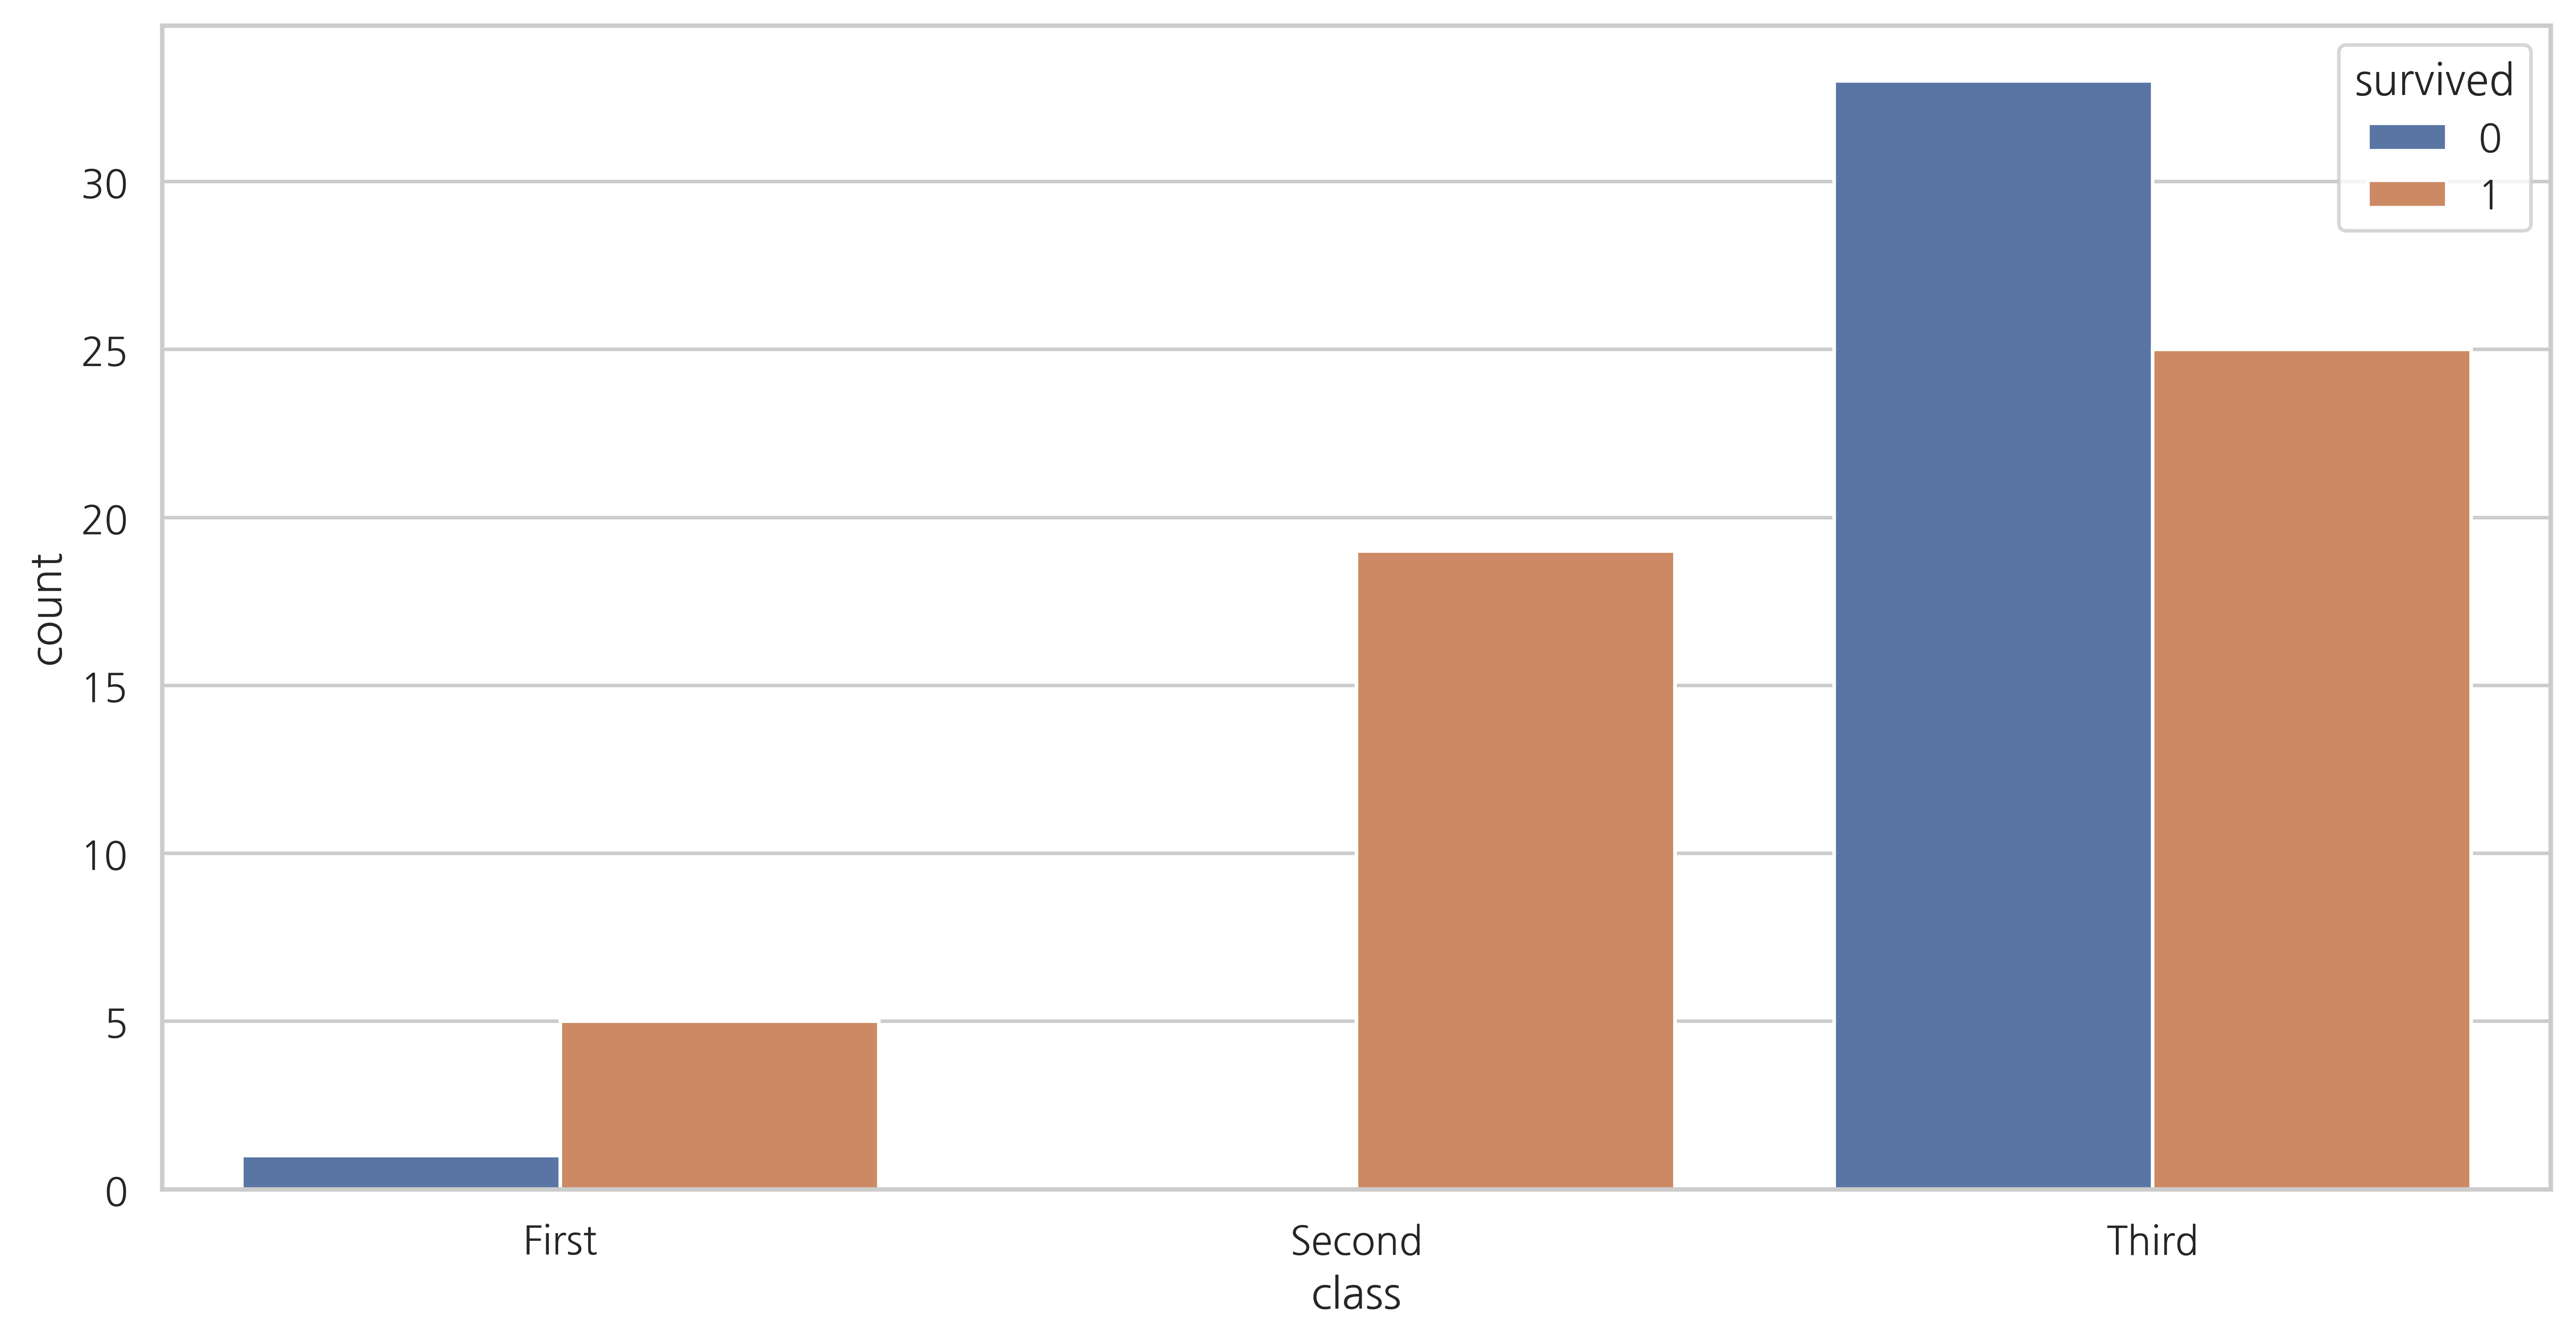

In [26]:
# child_df에서 class 변수별 survived한 아이들의 수 count하여 시각화 (seaborn 사용) 
sns.countplot(x='class',hue='survived' ,data=child_df)

In [34]:
# child_df에서 class가 Second인 경우 0.5, First인 경우 0.2, Third인 경우 0을 값으로 갖는 class_weight(list) 구하기

# class_weight을 child_df의 class_weight 이라는 열로 추가 

# 추가한 후 child_df의 앞의 5개행만 확인 
child_df["class_weight"]=[ 0.5 if x=='Second' else 0.2 if x=='First' else 0 for x in child_df['class'] ]

In [35]:
# 위에서 구한 age_weight과 female_weight, class_weight을 합친 값을 child_df의 score 이라는 열로 추가

# 추가한 후 child_df의 앞의 5개행만 확인 
child_df['score'] = child_df['age_weight'] + child_df['female_weight']+ child_df['class_weight']

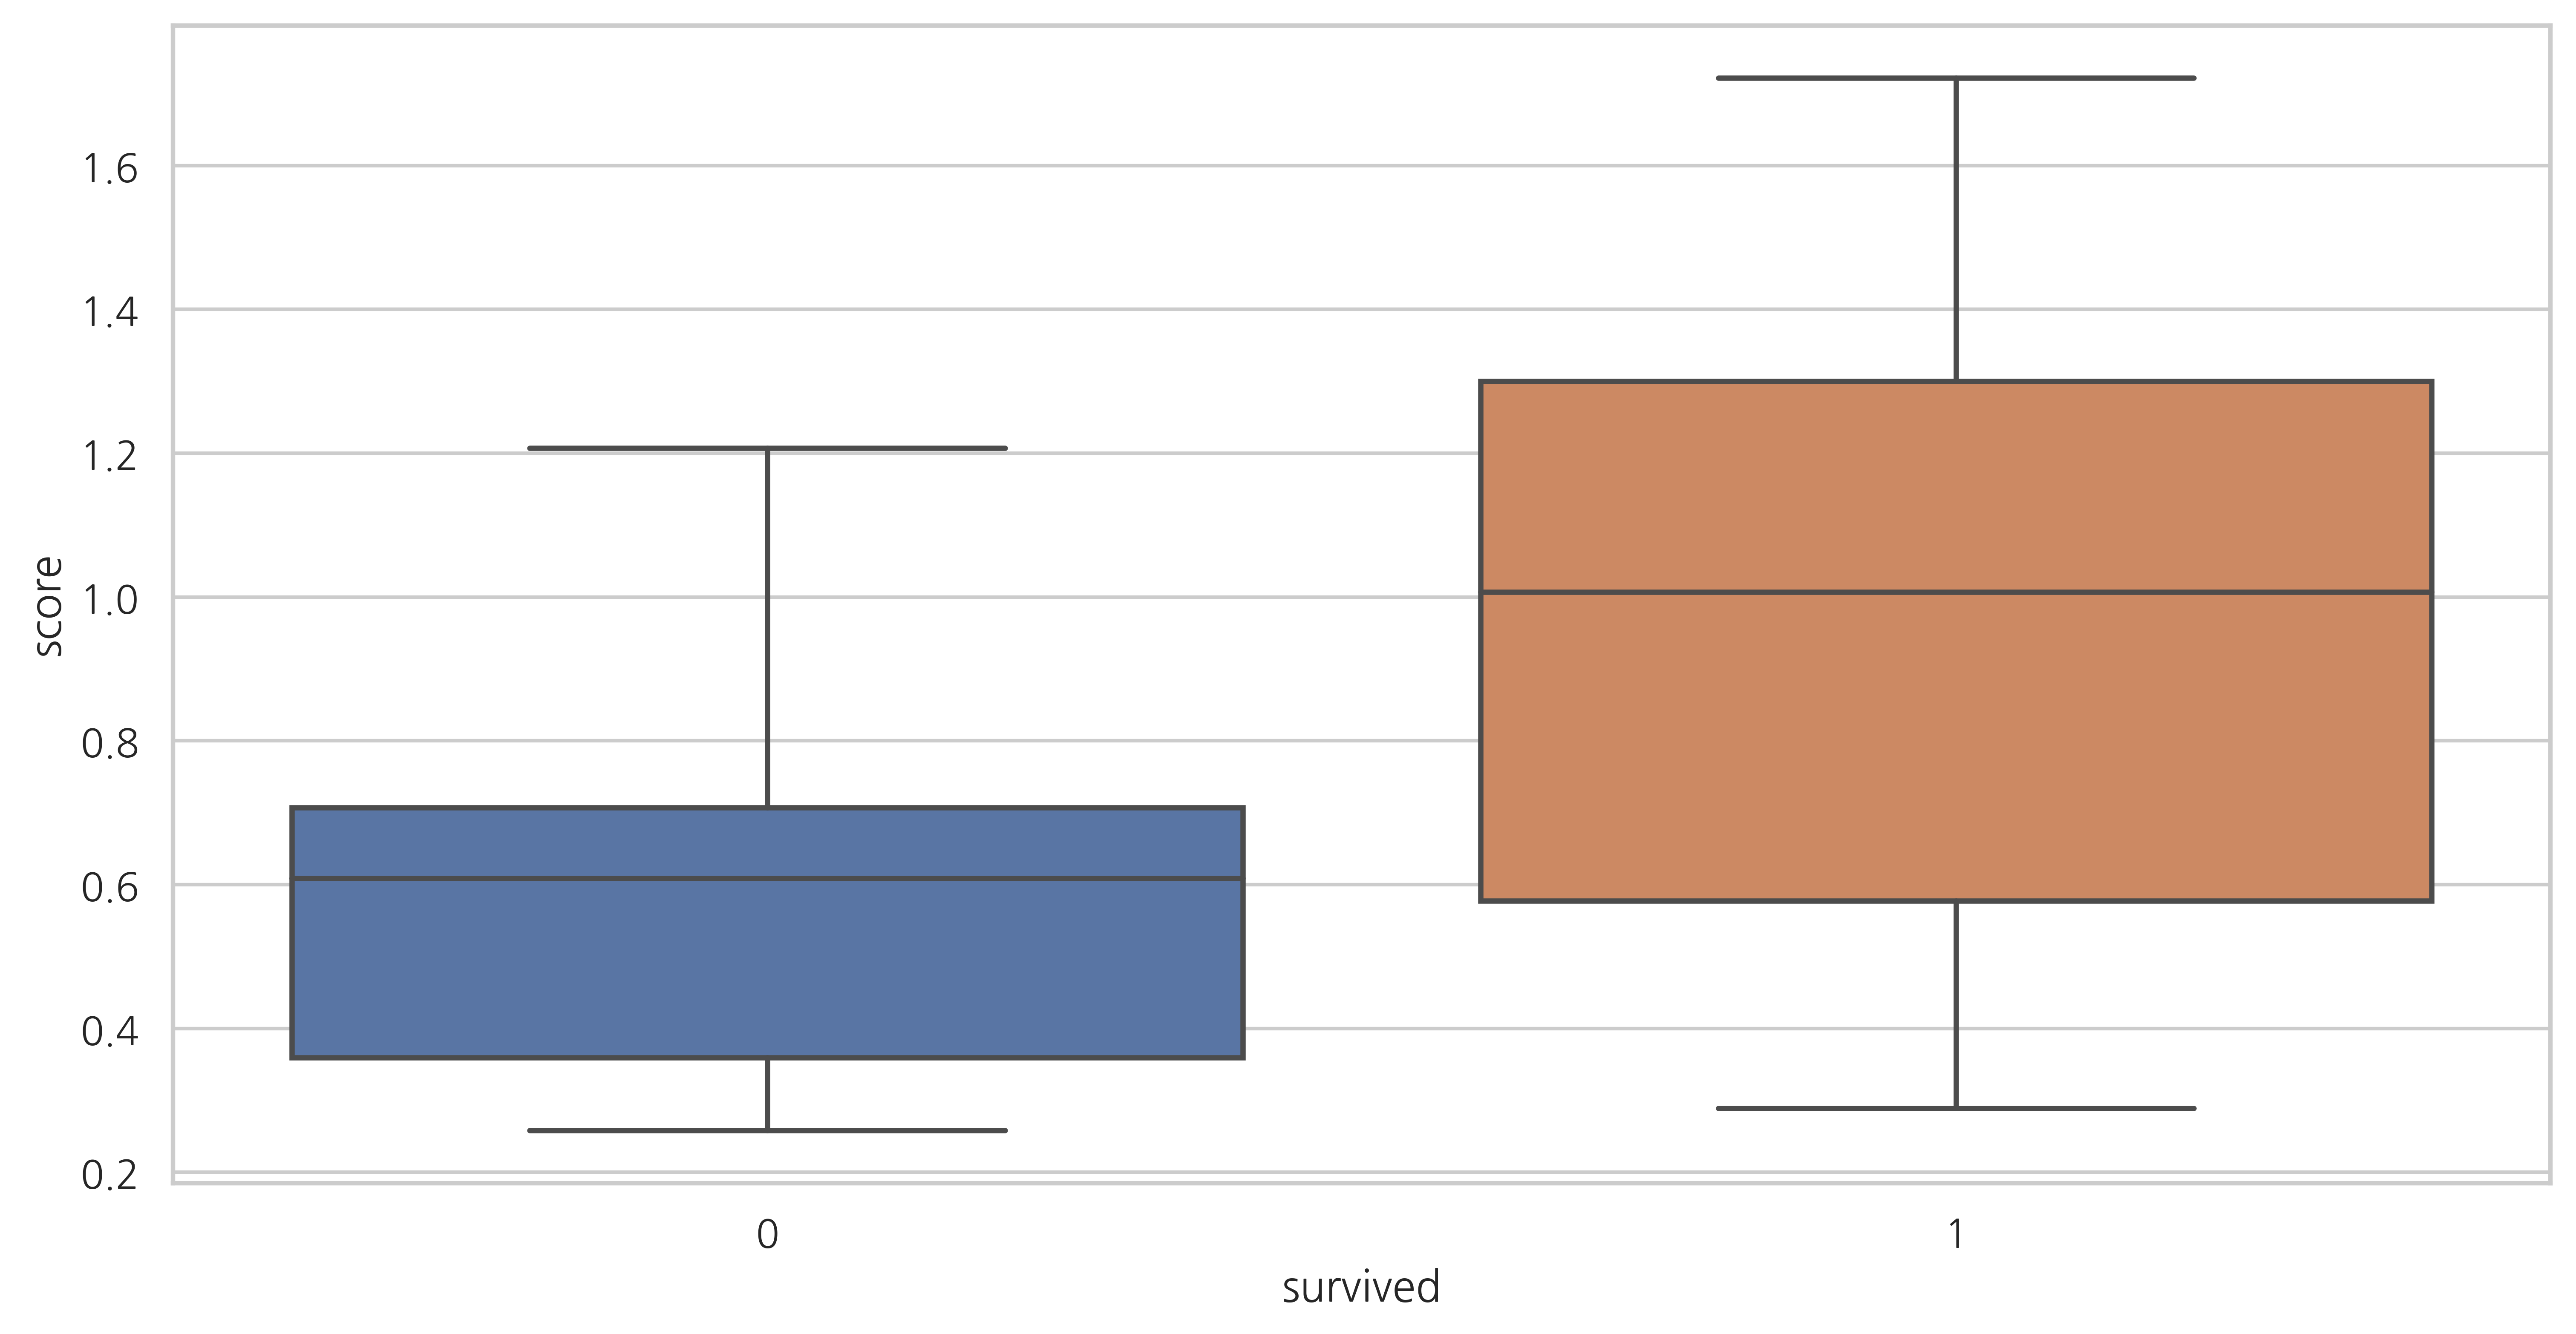

In [39]:
# survived 변수별 score값의 분포를 boxplot으로 시각화 (seaborn 사용) 
sns.boxplot( x='survived' , y='score', data=child_df)